In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from enum import Enum
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

### EDA

In [2]:
life_exep_data =pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\life epect\data\impv\final.csv")
life_exep_data.head()

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,Afghanistan,2000,Female,57.120,13.846,85.0,1.368449e+10,1.824044e+10,6.4,434.739537,...,24.0,65.076923,27.0,0.30,21.870802,85.0,22.078,77.922,39.4,4.8
1,Afghanistan,2001,Female,57.596,13.849,82.7,1.368449e+10,1.824044e+10,7.2,434.739537,...,33.0,65.076923,37.0,0.39,21.881304,84.0,22.169,77.831,40.1,4.8
2,Afghanistan,2002,Female,58.080,14.355,80.4,4.055180e+09,1.824044e+10,8.2,179.426579,...,36.0,65.076923,35.0,0.39,23.274193,87.0,22.261,77.739,40.5,4.6
3,Afghanistan,2003,Female,58.578,14.222,77.8,4.515559e+09,1.824044e+10,9.4,190.683814,...,41.0,65.076923,39.0,0.39,24.667435,86.0,22.353,77.647,40.1,4.6
4,Afghanistan,2004,Female,59.093,14.047,75.3,5.226779e+09,1.824044e+10,10.4,211.382074,...,50.0,65.076923,48.0,0.39,26.067695,89.0,22.500,77.500,40.2,4.6


In [3]:
life_exep_data.shape

(9928, 22)

In [4]:
life_exep_data .describe()

,Year,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
count,9928.000000,9928.000000,9928.000000,9928.000000,9.928000e+03,9.928000e+03,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000,9928.000000
mean,2009.495367,69.833645,8.256285,30.234766,2.032870e+12,2.042054e+12,60.593023,12668.853095,18.229214,136.043211,85.685266,81.307785,84.854727,2.986346,71.105951,76.725636,55.558734,44.441266,22.099540,10.619222
std,5.761572,9.301549,6.155461,25.460810,7.249370e+12,7.254721e+12,36.963992,19447.597833,8.222567,176.090014,14.208445,18.468902,14.218056,2.284127,29.583123,14.756537,22.435801,22.435801,8.504364,11.070262
min,2000.000000,38.861000,0.052000,1.400000,6.310127e+07,7.280219e+07,0.000000,111.927225,0.000000,0.000000,19.000000,0.049754,16.000000,0.010000,2.755094,0.000000,8.246000,0.000000,4.400000,0.000000
25%,2005.000000,63.894250,4.331000,9.300000,7.267552e+09,7.584112e+09,23.000000,1366.059425,12.700000,21.000000,81.000000,75.082677,79.000000,1.308194,46.007247,73.000000,36.518500,26.118280,16.300000,4.000000
50%,2009.000000,71.445000,6.561500,23.300000,4.524797e+10,4.594036e+10,61.950001,4348.605304,18.229214,82.000000,90.103762,86.700000,89.320315,2.632000,84.227286,78.000000,55.367000,44.633000,21.924913,7.800000
75%,2014.000000,76.845250,10.132750,44.865050,5.012787e+11,5.230617e+11,99.333589,14443.944185,24.100000,159.000000,96.000000,95.000000,95.092289,3.600000,97.177042,86.000000,73.881720,63.481500,26.200000,12.300000
max,2019.000000,88.100000,43.166000,146.200000,8.756805e+13,8.753272e+13,100.000000,180366.715198,64.600000,1590.000000,99.000000,99.000000,99.000000,14.690000,100.000004,100.000000,100.000000,91.754000,64.100000,147.800000


In [5]:
life_exep_data.skew(numeric_only=True)

Year                                      -0.000795
Life expectancy                           -0.617472
Unemployment                               1.768284
Infant Mortality                           1.088911
GDP                                        5.889286
GNI                                        5.909525
Clean fuels and cooking technologies      -0.383356
Per Capita                                 2.994002
Mortality caused by road traffic injury    0.212769
Tuberculosis Incidence                     3.097059
DPT Immunization                          -1.660525
HepB3 Immunization                        -1.791733
Measles Immunization                      -1.434180
Hospital beds                              1.667815
Basic sanitation services                 -0.759386
Tuberculosis treatment                    -2.229840
Urban population                           0.066527
Rural population                          -0.066527
Non-communicable Mortality                 0.880220
Sucide Rate 

In [6]:
def plot_histogram(data,xlabel,ylabel,title):
    plt.figure(figsize=(10,6))
    plt.hist(data,edgecolor="green")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show(1);

In [7]:
def get_outliner(df,column):
    Q1=np.percentile(df[column],25,interpolation='midpoint')
    Q3=np.percentile(df[column],75,interpolation='midpoint')
    IQR=Q3-Q1
    return df[(df[column]>=(Q3+1.5*IQR)) | (df[column]<=(Q1-1.5*IQR))].sort_values(by=[column]).reset_index()

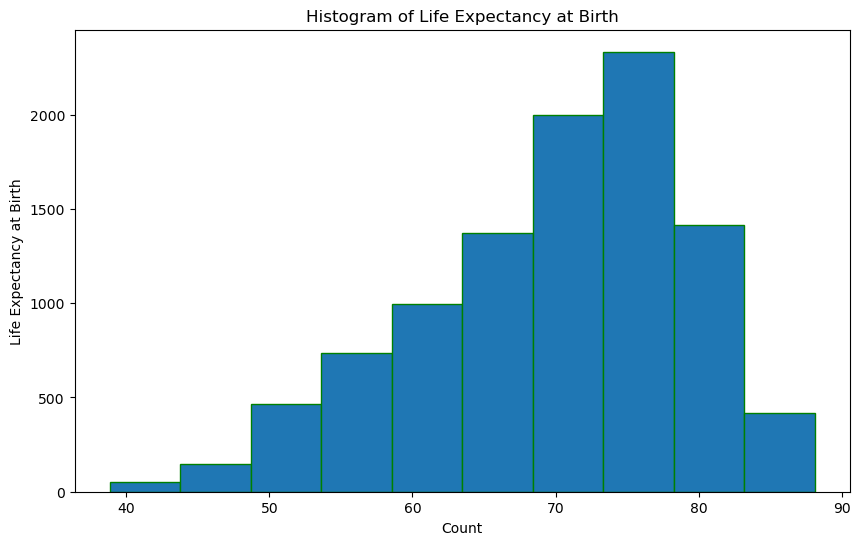

In [8]:
plot_histogram(life_exep_data['Life expectancy'], 'Count', 'Life Expectancy at Birth', "Histogram of Life Expectancy at Birth")

In [9]:
life_exep_data['Life expectancy'].skew()

-0.617472379194249

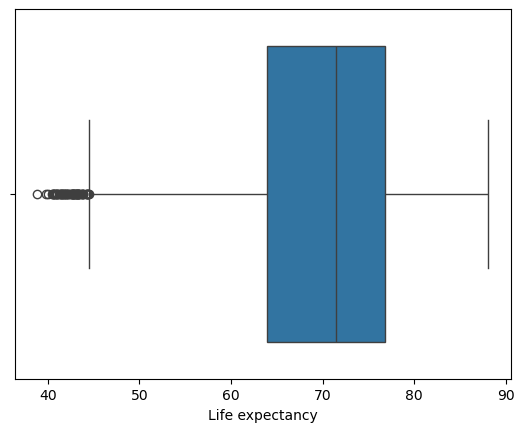

In [10]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Life expectancy'])
plt.show()

In [11]:
df = get_outliner(life_exep_data, 'Life expectancy')

df[['Country','Year','Gender','Life expectancy']]

,Country,Year,Gender,Life expectancy
0,Sierra Leone,2000,Male,38.861
1,Sierra Leone,2001,Male,39.745
2,Sierra Leone,2000,Female,40.005
3,Lesotho,2006,Male,40.418
4,Lesotho,2007,Male,40.555
5,Lesotho,2005,Male,40.566
6,Eswatini,2005,Male,40.663
7,Sierra Leone,2002,Male,40.708
8,Eswatini,2004,Male,40.749
9,Eswatini,2006,Male,40.923


In [12]:
def plot_pie_chart(data, title):
    counts = data.value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(title)
    plt.show()

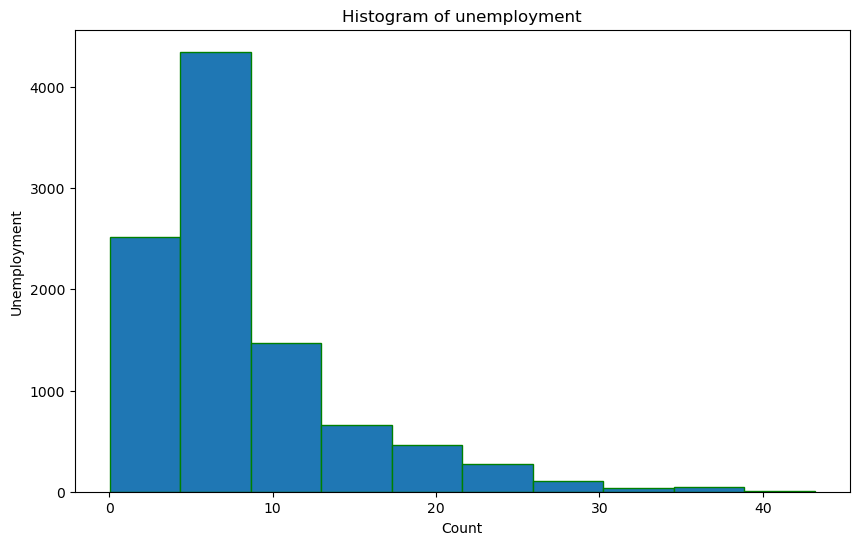

In [13]:
plot_histogram(life_exep_data['Unemployment'], 'Count', 'Unemployment', "Histogram of unemployment")

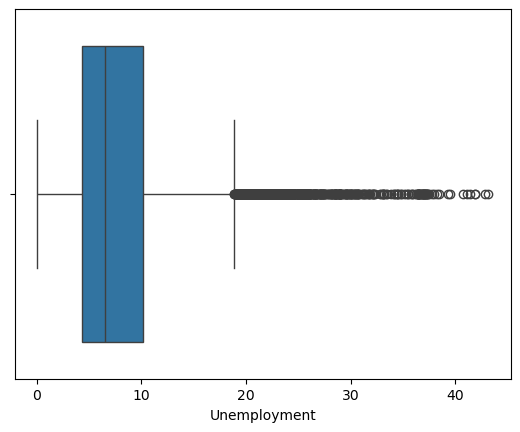

In [14]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Unemployment'])
plt.show()

In [15]:
df = get_outliner(life_exep_data, 'Unemployment')

df[['Country','Year','Gender','Unemployment']]

,Country,Year,Gender,Unemployment
0,Bulgaria,2001,Female,18.855000
1,Bosnia and Herzegovina,2017,Male,18.857000
2,Poland,2003,Male,18.898001
3,St. Lucia,2015,Male,18.905001
4,"Congo, Rep.",2012,Male,18.910999
...,...,...,...,...
753,South Africa,2002,Female,41.372002
754,West Bank and Gaza,2018,Female,41.873001
755,Lesotho,2001,Female,41.936001
756,West Bank and Gaza,2017,Female,42.811001


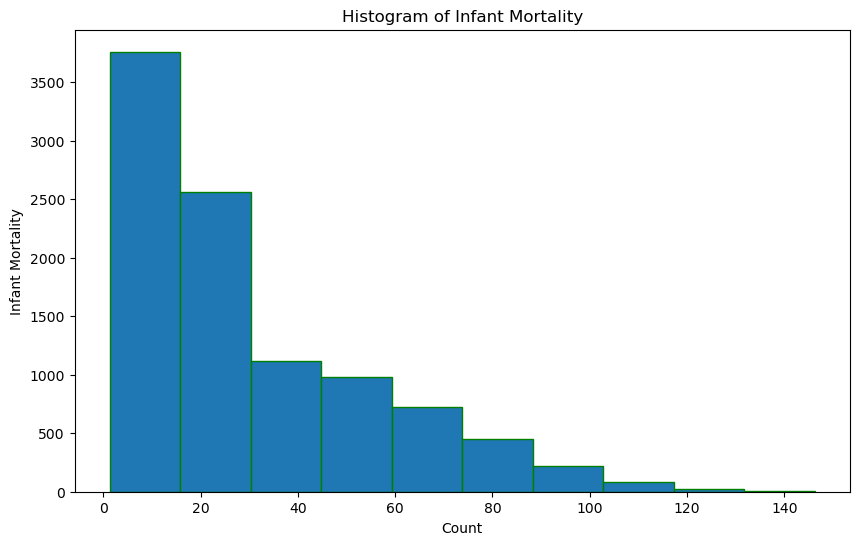

In [16]:
plot_histogram(life_exep_data['Infant Mortality'], 'Count', 'Infant Mortality', "Histogram of Infant Mortality")

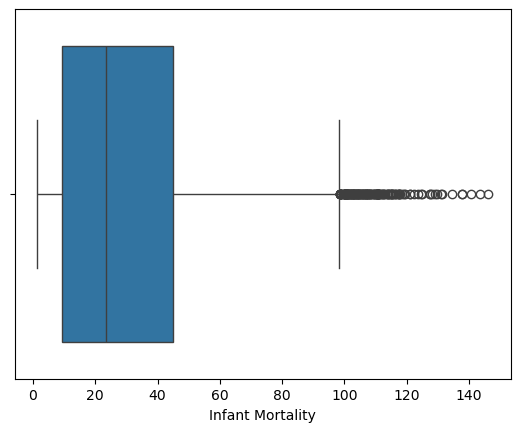

In [17]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Infant Mortality'])
plt.show()

In [18]:
df = get_outliner(life_exep_data, 'Infant Mortality')

df[['Country','Year','Gender','Infant Mortality']].head()

,Country,Year,Gender,Infant Mortality
0,Liberia,2005,Male,98.500000
1,Chad,2006,Male,98.500000
2,Equatorial Guinea,2000,Female,98.500000
3,Sub-Saharan Africa (IDA & IBRD countries),2000,Male,98.550777
4,Sub-Saharan Africa (excluding high income),2000,Male,98.555597


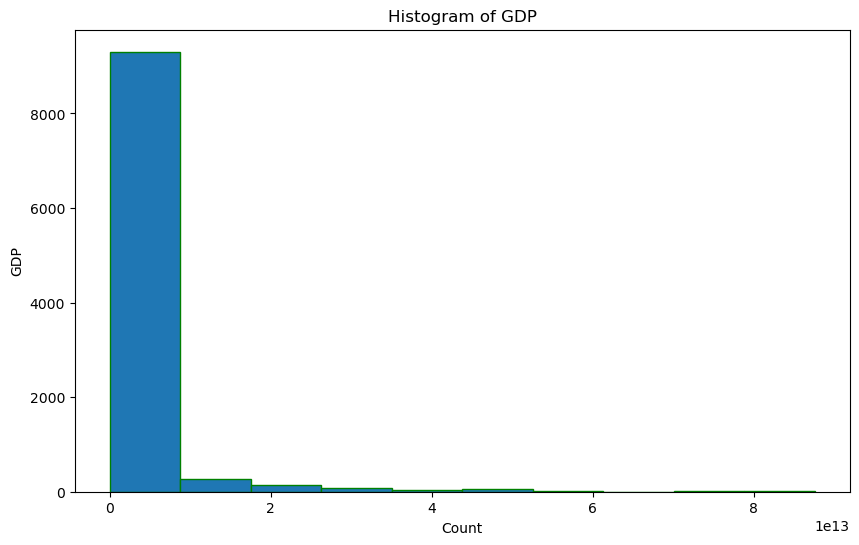

In [19]:
plot_histogram(life_exep_data['GDP'], 'Count', 'GDP', "Histogram of GDP")

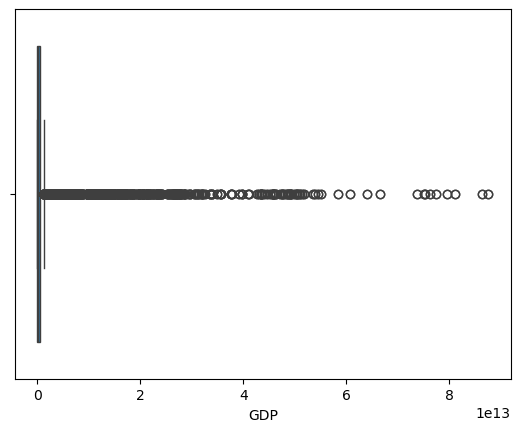

In [20]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GDP'])
plt.show()

In [21]:
life_exep_data['GDP'].skew()

5.889286292623093

In [22]:
df = get_outliner(life_exep_data, 'GDP')

df[['Country','Year','Gender','GDP']].sort_values(by='GDP',ascending=False)

,Country,Year,Gender,GDP
1779,World,2019,Male,8.756805e+13
1778,World,2019,Female,8.756805e+13
1777,World,2018,Female,8.626760e+13
1776,World,2018,Male,8.626760e+13
1775,World,2017,Female,8.119329e+13
...,...,...,...,...
5,Pre-demographic dividend,2017,Male,1.258666e+12
2,Europe & Central Asia (IDA & IBRD countries),2003,Female,1.257924e+12
3,Europe & Central Asia (IDA & IBRD countries),2003,Male,1.257924e+12
1,"Korea, Rep.",2011,Male,1.253223e+12


In [23]:
outlier_countries = df['Country'].unique()
remove_list = ["Korea, Rep.", "Spain", "Mexico", "Italy", "Russian Federation", "Canada", "Australia", "China", "India", "France", "Brazil", "United Kingdom", "Germany", "St. Martin (French part)", "Korea, Dem. People's Rep.", "Japan", "United States"]
remove_list = np.setdiff1d(outlier_countries,remove_list)

In [24]:
life_exep_data[life_exep_data.Country.isin(remove_list)]

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
140,Arab World,2000,Female,69.699913,17.881457,40.374743,8.160388e+11,7.967683e+11,75.327700,2890.227674,...,82.937372,55.255054,81.452540,1.599373,73.305120,76.725636,52.989302,47.010698,22.325529,3.240328
141,Arab World,2001,Female,69.959985,17.757436,39.165524,7.985250e+11,7.840983e+11,76.636203,2768.502103,...,84.082923,59.460461,81.010248,1.642781,73.567505,76.725636,53.251444,46.748556,22.457249,3.189085
142,Arab World,2002,Female,70.218646,18.241415,37.948407,8.031423e+11,7.924489e+11,77.881214,2725.609752,...,82.016807,59.964674,81.158296,1.576436,74.163207,76.725636,53.515626,46.484374,22.451118,3.137460
143,Arab World,2003,Female,70.483623,18.103251,36.858308,8.878742e+11,8.735350e+11,79.027092,2948.632623,...,82.385623,60.287509,81.399618,1.571151,74.547420,76.725636,53.801167,46.198833,22.313826,3.066200
144,Arab World,2004,Female,70.758013,17.905647,35.732514,1.056272e+12,1.044493e+12,80.001686,3430.982910,...,83.301433,66.779873,82.044559,1.606222,74.959347,76.725636,54.105582,45.894418,22.108387,3.018197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,World,2015,Male,69.784159,5.492699,33.500000,7.511244e+13,7.523260e+13,61.620616,10222.608270,...,84.784698,82.716929,84.949254,2.706085,72.764134,83.000000,53.916450,46.083550,22.725381,13.027683
9864,World,2016,Male,70.014462,5.521862,32.600000,7.630506e+13,7.628228e+13,62.745657,10264.928662,...,85.841740,84.017726,85.204317,2.759013,73.903638,81.000000,54.373633,45.626367,22.607223,12.860078
9865,World,2017,Male,70.227388,5.422672,31.700000,8.119329e+13,8.129507e+13,63.801895,10798.152765,...,85.795425,83.650285,85.257266,2.894239,74.929718,85.000000,54.827803,45.172197,22.196595,12.775034
9866,World,2018,Male,70.409478,5.283458,30.900000,8.626760e+13,8.624380e+13,65.062513,11347.335847,...,85.616669,83.468071,85.648060,2.735823,76.034297,85.000000,55.276691,44.723309,21.947225,12.756444


In [25]:
life_exep_data = life_exep_data[~life_exep_data.Country.isin(remove_list)]

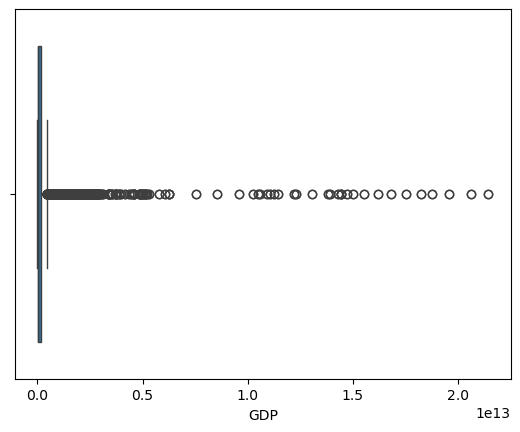

In [26]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GDP'])
plt.show()

In [27]:
df = get_outliner(life_exep_data, 'GDP')

df[['Country','Year','Gender','GDP']]


,Country,Year,Gender,GDP
0,South Africa,2011,Male,4.582015e+11
1,South Africa,2011,Female,4.582015e+11
2,"Iran, Islamic Rep.",2013,Male,4.602931e+11
3,"Iran, Islamic Rep.",2013,Female,4.602931e+11
4,Africa Western and Central,2007,Female,4.617776e+11
...,...,...,...,...
1103,United States,2017,Male,1.954298e+13
1104,United States,2018,Female,2.061186e+13
1105,United States,2018,Male,2.061186e+13
1106,United States,2019,Female,2.143322e+13


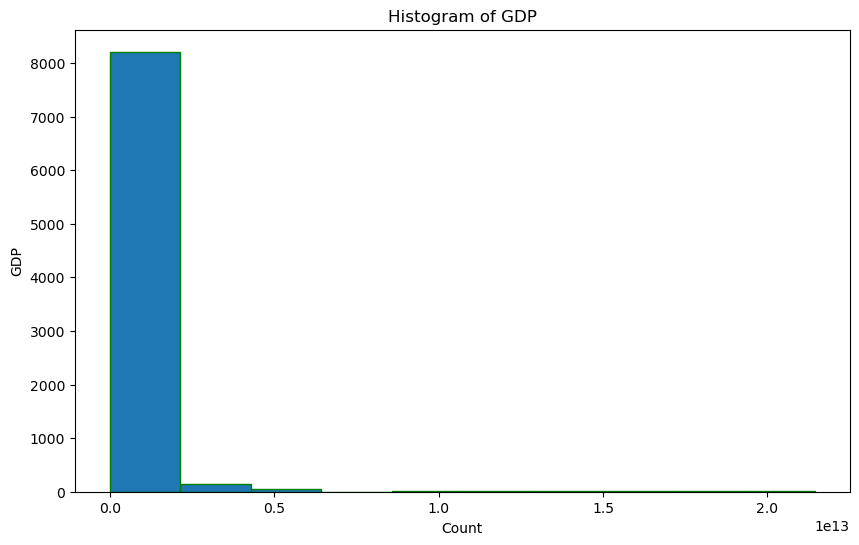

In [28]:
plot_histogram(life_exep_data['GDP'], 'Count', 'GDP', "Histogram of GDP")

In [29]:
life_exep_data['GDP'] = np.log(life_exep_data['GDP'])

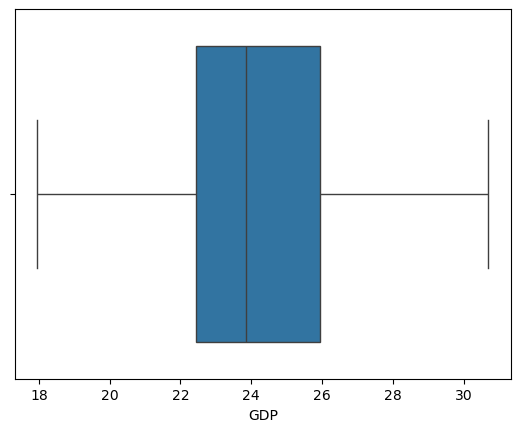

In [30]:
sns.boxplot(data=life_exep_data, x=life_exep_data['GDP'])
plt.show()

In [31]:
life_exep_data[(life_exep_data['Year']==2019)]['GDP'].mean()

24.599324597087456

In [32]:
sub = life_exep_data[life_exep_data['Country'] == 'United States']
sub[['Country','Year','Gender','GDP', 'GNI']]

,Country,Year,Gender,GDP,GNI
4704,United States,2000,Female,29.958528,1.038367e+13
4705,United States,2001,Female,29.990159,1.074607e+13
4706,United States,2002,Female,30.023120,1.105222e+13
4707,United States,2003,Female,30.069731,1.153485e+13
4708,United States,2004,Female,30.133582,1.231764e+13
4709,United States,2005,Female,30.198785,1.316652e+13
4710,United States,2006,Female,30.256748,1.406638e+13
4711,United States,2007,Female,30.301844,1.455010e+13
4712,United States,2008,Female,30.319742,1.471811e+13
4713,United States,2009,Female,30.301642,1.442627e+13


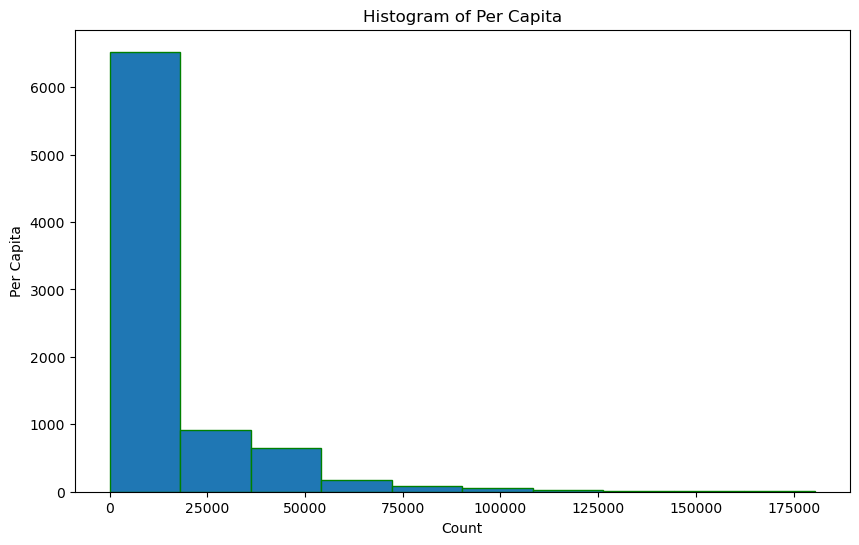

In [33]:
plot_histogram(life_exep_data['Per Capita'], 'Count', 'Per Capita', "Histogram of Per Capita")

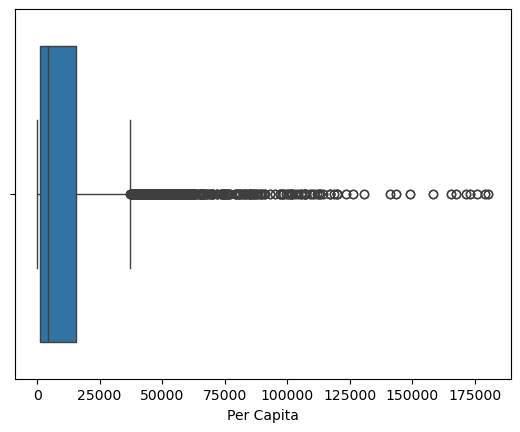

In [34]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Per Capita'])
plt.show()

In [35]:
df = get_outliner(life_exep_data, 'Per Capita')
df[['Country','Year','Gender','Per Capita']]

,Country,Year,Gender,Per Capita
0,New Caledonia,2008,Male,37353.737296
1,New Caledonia,2008,Female,37353.737296
2,New Caledonia,2010,Male,37494.895155
3,New Caledonia,2010,Female,37494.895155
4,Kuwait,2009,Male,37561.725926
...,...,...,...,...
955,Liechtenstein,2019,Female,175813.875592
956,Liechtenstein,2014,Male,178864.851914
957,Liechtenstein,2014,Female,178864.851914
958,Liechtenstein,2018,Female,180366.715198


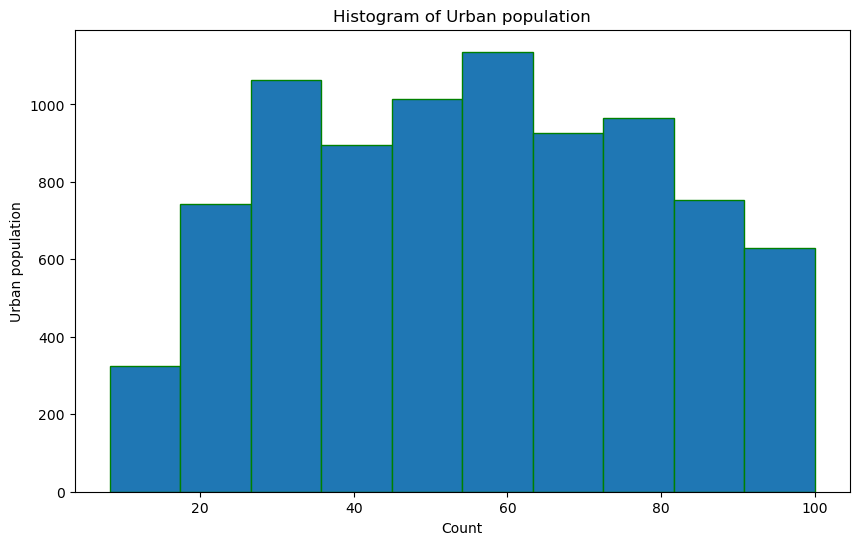

In [36]:
plot_histogram(life_exep_data['Urban population'], 'Count', 'Urban population', "Histogram of Urban population")

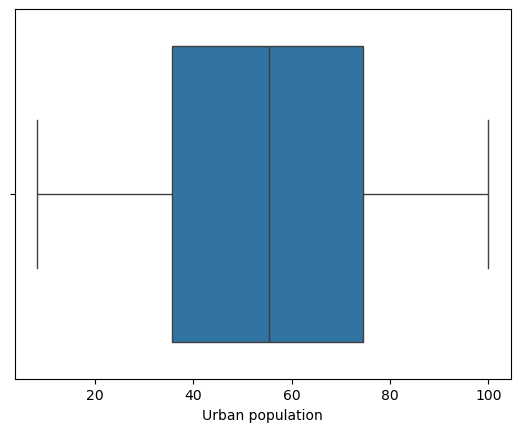

In [37]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Urban population'])
plt.show()

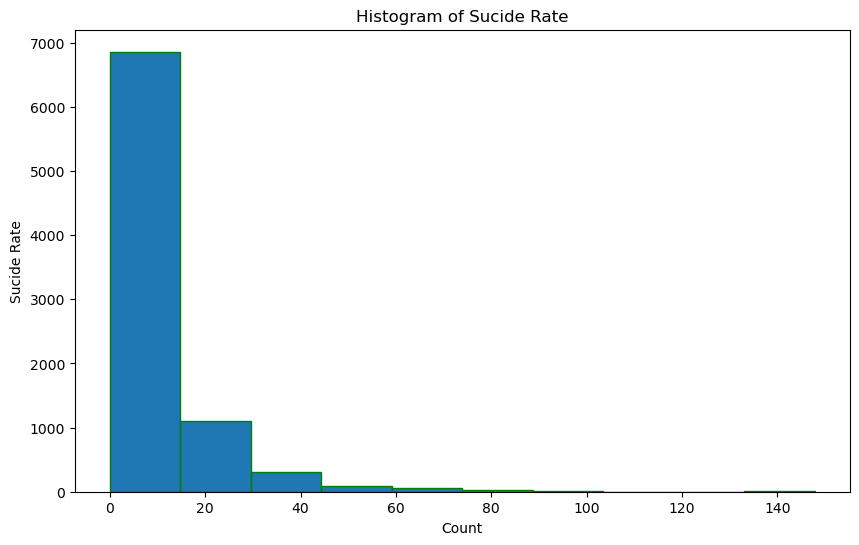

In [38]:
plot_histogram(life_exep_data['Sucide Rate'], 'Count', 'Sucide Rate', "Histogram of Sucide Rate")

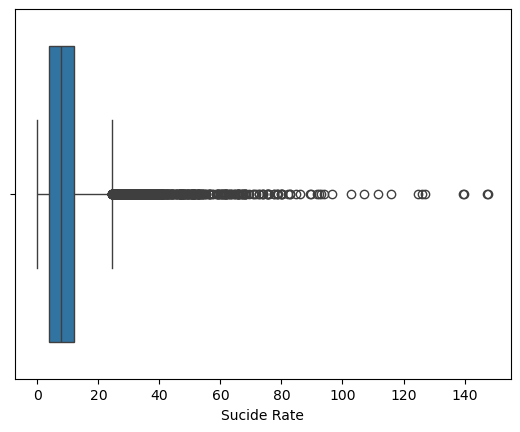

In [39]:
sns.boxplot(data=life_exep_data, x=life_exep_data['Sucide Rate'])
plt.show()

In [40]:
df = get_outliner(life_exep_data, 'Sucide Rate')
df[['Country','Year','Gender','Sucide Rate']].sort_values(by=['Sucide Rate','Year'],ascending=False)

,Country,Year,Gender,Sucide Rate
707,Lesotho,2014,Male,147.8
706,Lesotho,2015,Male,147.3
705,Lesotho,2013,Male,139.9
704,Lesotho,2016,Male,139.6
703,Lesotho,2017,Male,127.2
...,...,...,...,...
1,Sri Lanka,2013,Male,24.4
4,Mozambique,2012,Male,24.4
5,"Korea, Rep.",2009,Female,24.4
0,Switzerland,2003,Male,24.4


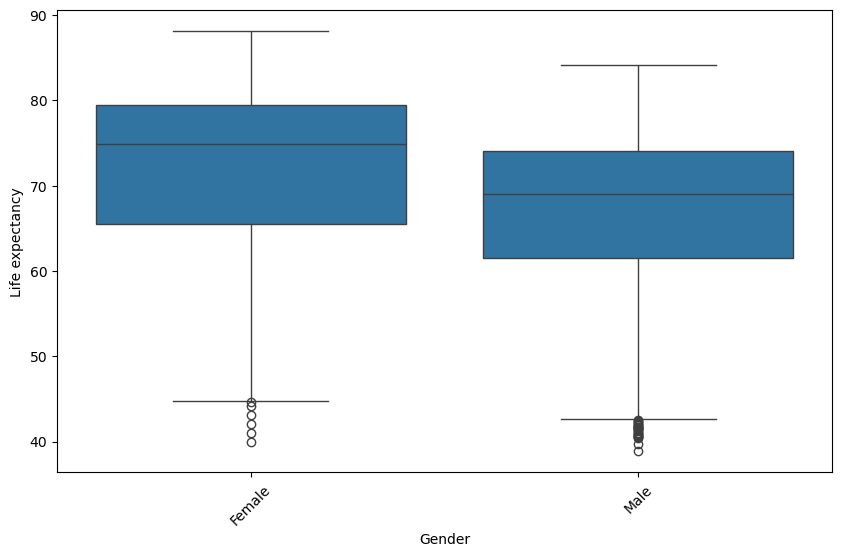

In [41]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Gender', y='Life expectancy', data=life_exep_data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show(1)

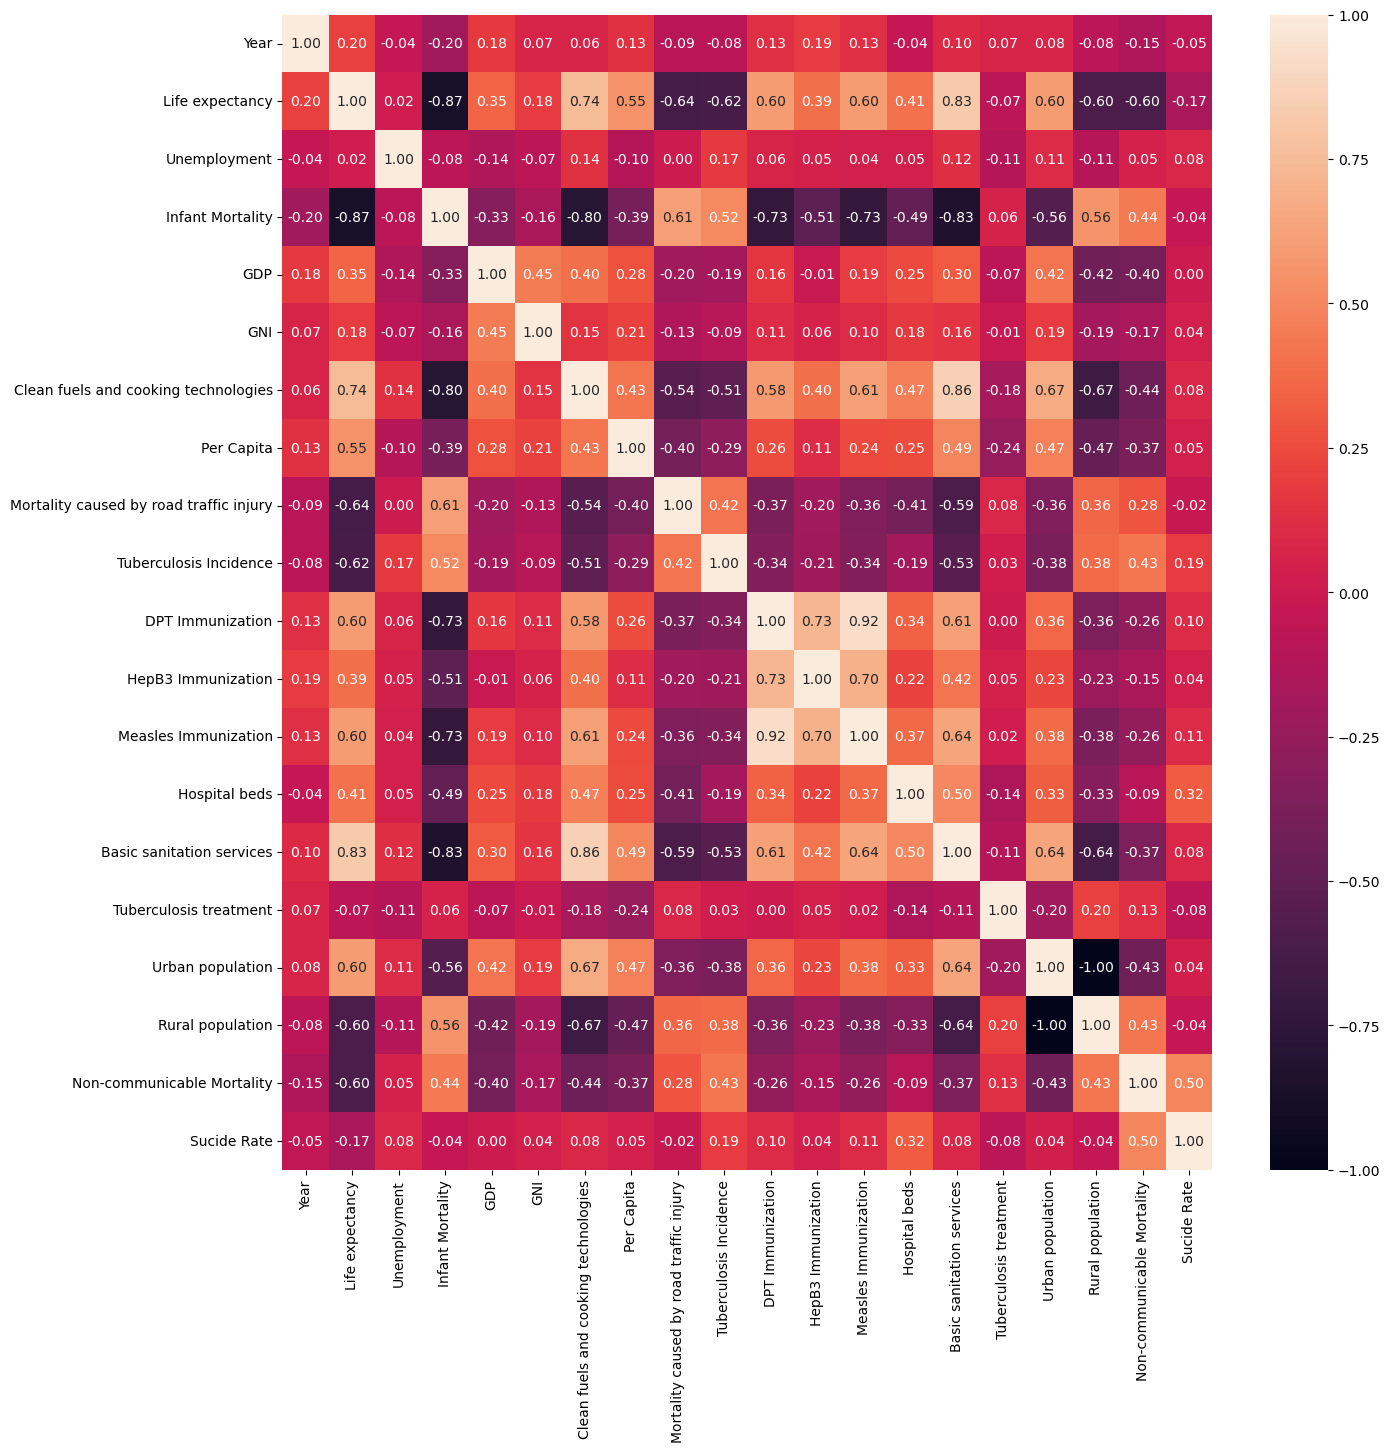

In [42]:
plt.figure(figsize=(15, 15))
sns.heatmap(life_exep_data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

### standarization of data

In [43]:
y = life_exep_data.iloc[:,3:4]
X = life_exep_data.drop(['Country', 'Year', 'Life expectancy', 'Gender'], axis=1)

In [44]:
X

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,13.846,85.0,23.339529,1.824044e+10,6.400000,434.739537,14.7,190.0,24.0,65.076923,27.0,0.30,21.870802,85.0,22.078,77.922,39.4,4.8
1,13.849,82.7,23.339529,1.824044e+10,7.200000,434.739537,15.1,189.0,33.0,65.076923,37.0,0.39,21.881304,84.0,22.169,77.831,40.1,4.8
2,14.355,80.4,22.123261,1.824044e+10,8.200000,179.426579,14.9,189.0,36.0,65.076923,35.0,0.39,23.274193,87.0,22.261,77.739,40.5,4.6
3,14.222,77.8,22.230795,1.824044e+10,9.400000,190.683814,15.0,189.0,41.0,65.076923,39.0,0.39,24.667435,86.0,22.353,77.647,40.1,4.6
4,14.047,75.3,22.377061,1.824044e+10,10.400000,211.382074,15.2,189.0,50.0,65.076923,48.0,0.39,26.067695,89.0,22.500,77.500,40.2,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,4.352,46.6,23.717152,1.959700e+10,29.799999,1445.069702,38.7,242.0,87.0,87.000000,86.0,2.35,38.120646,81.0,32.385,67.615,32.5,23.8
9924,4.358,45.1,23.746062,2.015340e+10,29.700001,1464.588957,39.9,233.0,90.0,90.000000,95.0,2.35,37.529193,81.0,32.296,67.704,31.8,22.5
9925,4.353,44.2,23.590306,1.727577e+10,29.600000,1235.189032,40.1,221.0,89.0,89.000000,90.0,2.35,36.941673,83.0,32.237,67.763,30.9,21.0
9926,4.360,42.9,23.620036,1.781019e+10,29.799999,1254.642265,40.6,210.0,89.0,89.000000,88.0,2.35,36.357160,84.0,32.209,67.791,30.3,19.9


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
X_train

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
1570,9.374000,3.000000,28.582193,2.647250e+12,100.000000,38685.258494,5.500000,9.000000,96.000000,90.000000,90.000000,5.980000,98.650010,24.000000,80.180,19.820,7.40000,8.000000
9617,10.360000,11.700000,25.523614,1.147841e+11,94.199997,2639.391654,17.000000,115.000000,71.000000,66.000000,75.000000,9.400000,96.101549,60.000000,68.502,31.498,42.80000,47.600000
8838,2.944000,6.800000,27.390886,7.942327e+11,100.000000,23337.017549,33.200000,10.000000,96.000000,97.000000,98.000000,2.296111,100.000000,90.000000,83.844,16.156,22.90000,9.100000
4869,16.674000,20.200000,22.357533,5.474700e+09,60.593023,1543.701414,5.300000,0.980000,85.685266,81.307785,84.854727,2.986346,91.465583,100.000000,73.061,26.939,22.09954,10.619222
7155,8.256285,30.234766,21.389727,2.022014e+09,60.593023,24864.436295,18.229214,136.043211,85.685266,81.307785,84.854727,2.986346,71.105951,76.725636,51.851,48.149,22.09954,10.619222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5133,7.778000,14.700000,26.531338,3.226576e+11,98.800003,8225.137583,13.300000,22.000000,94.000000,94.000000,96.000000,4.610000,91.975014,43.000000,90.691,9.309,22.90000,13.900000
9331,6.046000,3.500000,26.535416,3.399707e+11,100.000000,37321.797905,6.000000,5.100000,99.000000,57.888889,95.000000,3.050000,98.991171,83.000000,84.196,15.804,14.60000,19.700000
5619,11.398000,18.300000,21.191268,1.537742e+09,74.900002,3043.031382,25.000000,64.000000,93.000000,94.000000,92.000000,2.100000,70.341144,89.000000,64.300,35.700,17.10000,24.000000
3864,13.931000,11.400000,26.976704,5.289616e+11,100.000000,20078.260073,25.700000,18.000000,98.000000,98.000000,97.000000,2.210000,99.044633,61.000000,81.649,18.351,23.80000,1.500000


In [47]:
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

In [48]:
dire = r'C:\Users\tushar\Desktop\imrpved'
withoutPCADir = dire + 'without_pca\\'
if not os.path.exists(dire):
    os.mkdir(dire)

if not os.path.exists(withoutPCADir):
    os.mkdir(withoutPCADir)

In [49]:
pd.DataFrame(transformed_X_train).to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\X_train.csv', index=False, header=X_test.columns)
pd.DataFrame(transformed_X_test).to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\X_test.csv', index=False, header=X_test.columns)
y_train.to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\y_train.csv', index=False)
y_test.to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\y_test.csv', index=False)

In [50]:
pd.DataFrame(transformed_X_train, columns=X_train.columns).head(2)

,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Non-communicable Mortality,Sucide Rate
0,0.138392,-1.046496,1.931699,1.684975,1.065469,1.253004,-1.475651,-0.670176,0.694766,0.411169,0.346647,1.268336,0.897946,-3.321708,1.056210,-1.056210,-1.682609,-0.228771
1,0.289204,-0.709504,0.617111,-0.177511,0.911786,-0.517124,-0.135614,-0.115972,-1.014391,-0.975952,-0.679463,2.710912,0.814082,-1.039831,0.557375,-0.557375,2.302107,3.182021


In [51]:
pca = PCA(n_components=0.9)
pca_data = pca.fit(transformed_X_train)
pca_data.explained_variance_ratio_

array([0.38298092, 0.11216569, 0.09078823, 0.07189572, 0.05943483,
       0.04964402, 0.04732159, 0.03596914, 0.03177559, 0.02726995])

In [52]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)


array([38.3 , 49.52, 58.6 , 65.79, 71.73, 76.69, 81.42, 85.02, 88.2 ,
       90.93])

In [53]:
loadings = pca_data.components_

labels = ['PC' + str(x) for x in range(1, pca_data.n_components_+1)]

loadings_df = pd.DataFrame.from_dict(dict(zip(labels, loadings)))
loadings_df['variable'] = X_train.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
Unemployment,-0.022181,0.149552,0.239969,-0.510227,0.403257,0.255378,0.500820,0.178590,-0.094179,-0.109779
Infant Mortality,0.340177,-0.123192,0.067054,-0.003582,0.070578,-0.087842,-0.114862,0.046375,-0.042586,0.102621
GDP,-0.174463,-0.335987,0.072153,0.388184,0.277782,0.043326,0.067925,-0.325366,0.243717,-0.459397
GNI,-0.100518,-0.208770,0.088912,0.553728,0.315831,-0.052259,0.351859,0.302117,-0.453432,0.222579
Clean fuels and cooking technologies,-0.337341,-0.004189,0.056177,-0.101892,-0.025649,0.106475,0.035472,-0.133147,-0.041284,-0.225064
Per Capita,-0.215045,-0.240306,0.100074,0.006952,-0.225689,-0.301033,-0.129495,0.653919,0.213527,-0.074092
Mortality caused by road traffic injury,0.240452,0.018658,-0.007314,-0.010459,0.454317,-0.203685,-0.311784,-0.257561,-0.126120,0.056204
Tuberculosis Incidence,0.221664,0.106982,0.285816,0.018903,0.337574,-0.161905,0.079363,0.198865,0.655089,0.032803
DPT Immunization,-0.281086,0.363785,-0.134278,0.077647,0.126903,-0.210221,-0.017930,0.011564,0.033204,-0.100829


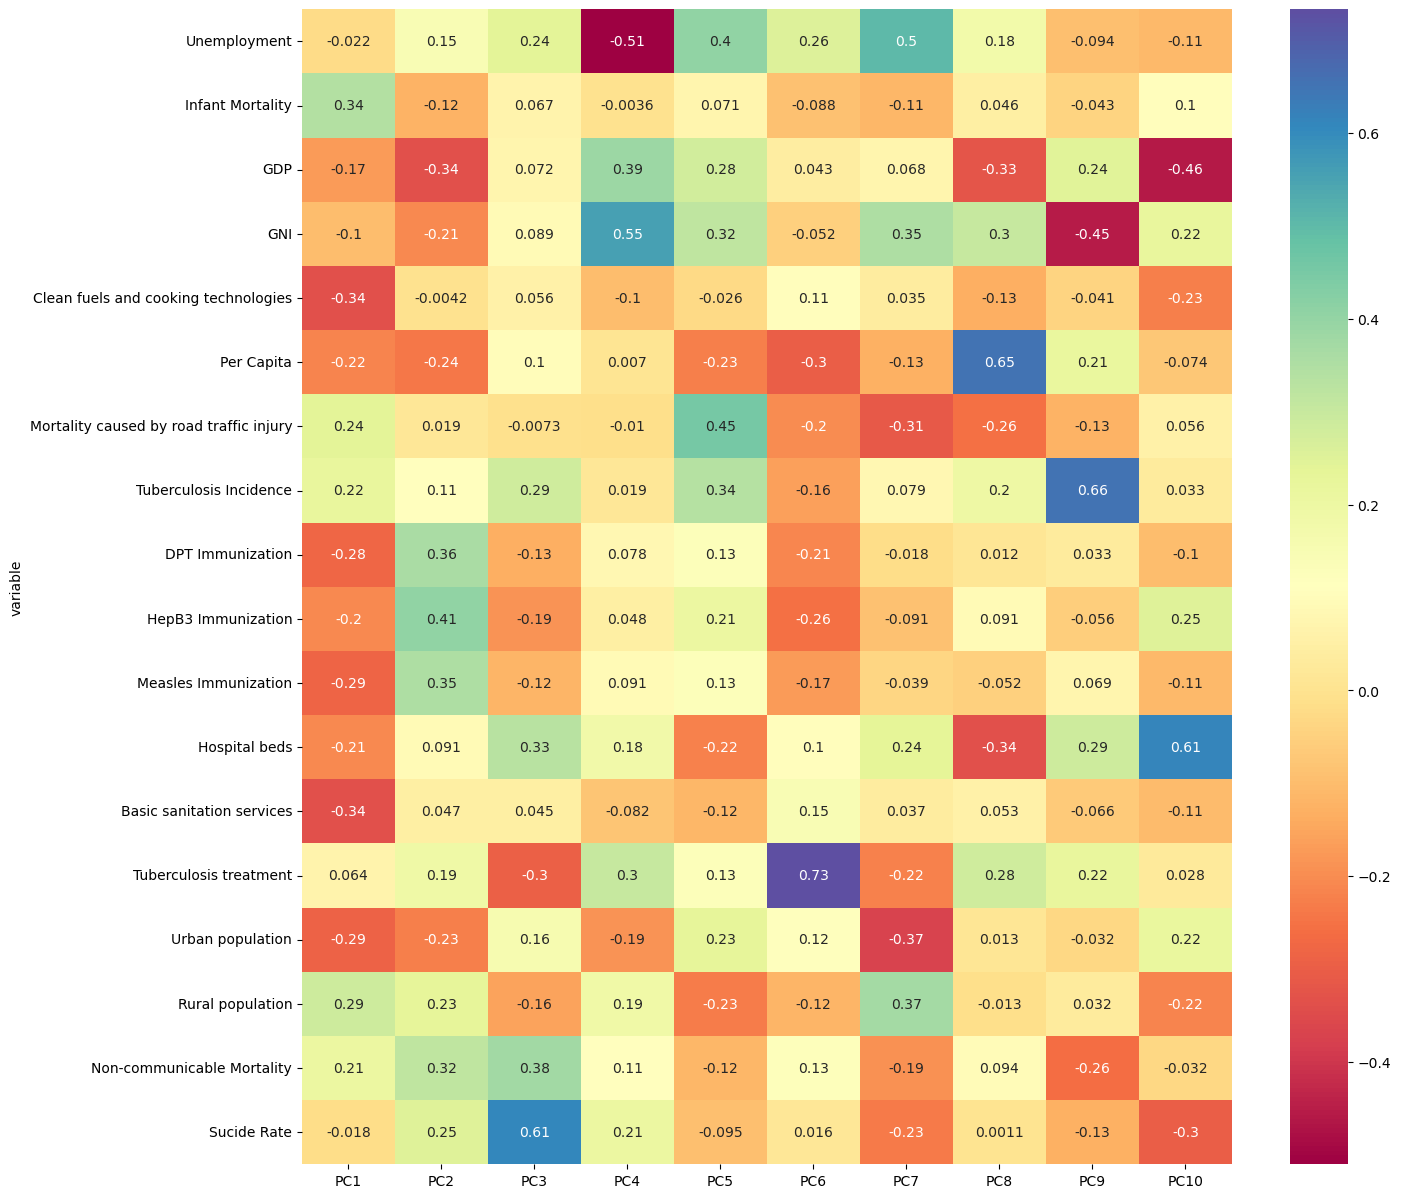

In [54]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show(1)

In [55]:
weight_df = loadings_df.reset_index().iloc[:, :3]
weight_df = pd.melt(weight_df, id_vars="variable", var_name="Component", value_name="Weight")

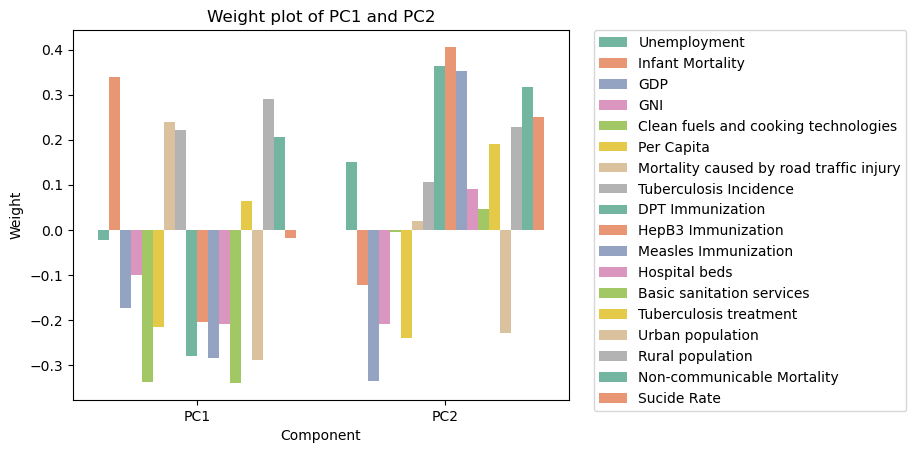

In [56]:
sns.barplot(x='Component', y='Weight', hue='variable', data=weight_df, palette=sns.color_palette("Set2")).set_title("Weight plot of PC1 and PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

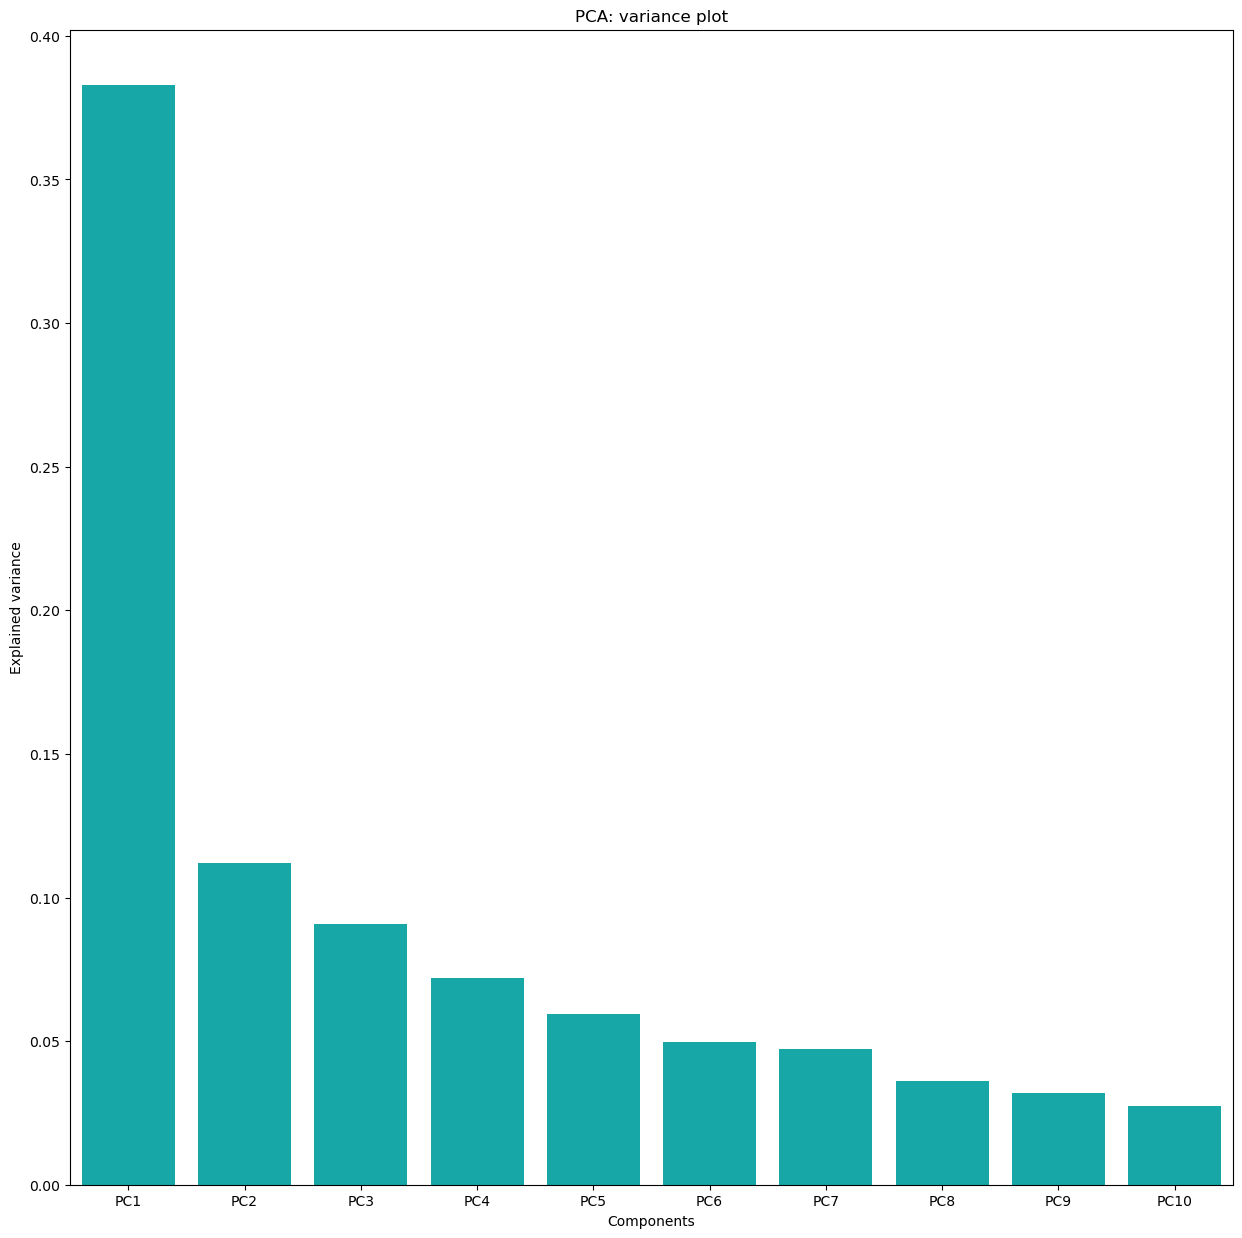

In [57]:
pca_df = pd.DataFrame({'Explained variance':pca_data.explained_variance_ratio_,'Components':labels})
plt.figure(figsize=(15, 15))
sns.barplot(x='Components',y="Explained variance",  data=pca_df, color="c").set_title("PCA: variance plot")
plt.show(1)

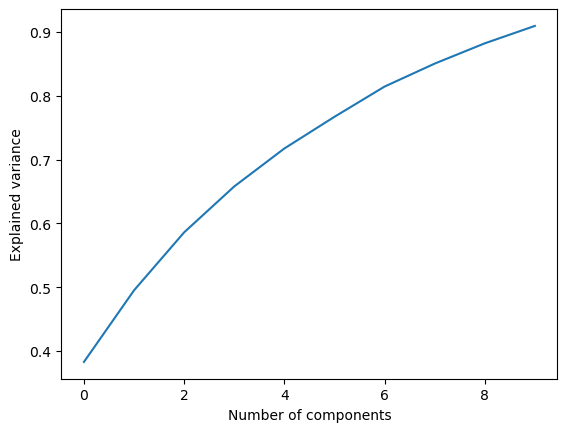

In [58]:
plt.plot(np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [59]:
X_train = pca.transform(transformed_X_train)
X_test = pca.transform(transformed_X_test)

In [60]:
X_train.shape

(5913, 10)

In [61]:
X_test.shape

(2535, 10)

In [62]:
y_train.shape

(5913, 1)

In [63]:
y_test.shape

(2535, 1)

In [64]:
pd.DataFrame(X_train).to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\X_train.csv', index=False)
pd.DataFrame(X_test).to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\X_test.csv', index=False)
y_train.to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\y_train.csv', index=False)
y_test.to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\y_test.csv', index=False)

### data cleaning

In [65]:
wdi_data=pd.read_csv(r'C:\Users\tushar\Desktop\data science\datasets\life epect\data\WDI_csv\WDIData.csv')
doctor_data=pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\life epect\data\Medical_doctors.csv")
nc_mortality_female = pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\life epect\data\nc_mortality_female\nc_mortality_female.csv",skiprows=4)
nc_mortality_male = pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\life epect\data\nc_mortality_male\nc_mortality_male.csv",skiprows=4)
sucide_female = pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\life epect\data\sucide_female\sucide_female.csv",skiprows=4)
sucide_male = pd.read_csv(r"C:\Users\tushar\Desktop\data science\datasets\life epect\data\sucide_male\sucide_male.csv",skiprows=4)

In [66]:
wdi_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383838 entries, 0 to 383837
Data columns (total 66 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    383838 non-null  object 
 1   Country Code    383838 non-null  object 
 2   Indicator Name  383838 non-null  object 
 3   Indicator Code  383838 non-null  object 
 4   1960            37306 non-null   float64
 5   1961            42355 non-null   float64
 6   1962            44599 non-null   float64
 7   1963            44449 non-null   float64
 8   1964            44990 non-null   float64
 9   1965            47183 non-null   float64
 10  1966            47213 non-null   float64
 11  1967            48962 non-null   float64
 12  1968            48544 non-null   float64
 13  1969            50390 non-null   float64
 14  1970            69081 non-null   float64
 15  1971            76036 non-null   float64
 16  1972            79137 non-null   float64
 17  1973      

In [68]:
wdi_data.drop(wdi_data.columns[len(wdi_data.columns)-1], axis=1, inplace=True)

In [69]:
wdi_data = pd.melt(wdi_data, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")

In [70]:
wdi_data.tail()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
23414113,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,2020,NaN
23414114,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,2020,NaN
23414115,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,2020,NaN
23414116,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2020,60.4
23414117,Zimbabwe,ZWE,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,2020,7500.0


In [71]:
wdi_data = wdi_data.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Code'])\
            .reset_index()
wdi_data.columns.name=None

In [72]:
wdi_data.tail()

,Country Name,Country Code,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
16160,Zimbabwe,ZWE,2016,NaN,249.520154,32.50,162000.0,41.876696,4000000.0,0.285096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16161,Zimbabwe,ZWE,2017,NaN,345.495495,38.35,162000.0,41.876696,4000000.0,0.280966,...,9.032539,4.561982,29.259153,0.817641,3.407481,0.609872,1.100615,2.446502,4.778166,8.099734
16162,Zimbabwe,ZWE,2018,NaN,345.495495,38.35,162000.0,41.876696,4000000.0,0.277031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16163,Zimbabwe,ZWE,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.893733,14.565084,15.862261,5.703138,4.807448,1.800944,5.747923,2.041201,4.674356,9.559706
16164,Zimbabwe,ZWE,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
wdi_data.shape

(16165, 1445)

In [74]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16165 entries, 0 to 16164
Columns: 1445 entries, Country Name to per_si_allsi.cov_q5_tot
dtypes: float64(1442), object(3)
memory usage: 178.2+ MB


In [75]:
print(f'There are {len(wdi_data.columns)} columns')

There are 1445 columns


In [76]:
life_exp_data=wdi_data.loc[:, ["Country Name","Year","SP.DYN.LE00.FE.IN","SP.DYN.LE00.MA.IN"]]

In [77]:
life_exp_data

,Country Name,Year,SP.DYN.LE00.FE.IN,SP.DYN.LE00.MA.IN
0,Afghanistan,1960,33.314,31.718
1,Afghanistan,1961,33.840,32.224
2,Afghanistan,1962,34.359,32.724
3,Afghanistan,1963,34.866,33.216
4,Afghanistan,1964,35.364,33.700
...,...,...,...,...
16160,Zimbabwe,2016,61.719,58.565
16161,Zimbabwe,2017,62.220,59.105
16162,Zimbabwe,2018,62.598,59.501
16163,Zimbabwe,2019,62.899,59.798


In [78]:
life_exp_data.rename(columns={'Country Name':'Country','SP.DYN.LE00.FE.IN': 'Female', 'SP.DYN.LE00.MA.IN': 'Male'}, inplace=True)
life_exp_data = pd.melt(life_exp_data, id_vars=["Country", "Year"], var_name="Gender", value_name="Life expectancy")

In [79]:
life_exp_data

,Country,Year,Gender,Life expectancy
0,Afghanistan,1960,Female,33.314
1,Afghanistan,1961,Female,33.840
2,Afghanistan,1962,Female,34.359
3,Afghanistan,1963,Female,34.866
4,Afghanistan,1964,Female,35.364
...,...,...,...,...
32325,Zimbabwe,2016,Male,58.565
32326,Zimbabwe,2017,Male,59.105
32327,Zimbabwe,2018,Male,59.501
32328,Zimbabwe,2019,Male,59.798


In [80]:
life_exp_data['Life expectancy'].isna().sum()

3110

In [81]:
life_exp_data.loc[life_exp_data['Life expectancy'].isna()]


,Country,Year,Gender,Life expectancy
60,Afghanistan,2020,Female,NaN
121,Africa Eastern and Southern,2020,Female,NaN
182,Africa Western and Central,2020,Female,NaN
243,Albania,2020,Female,NaN
304,Algeria,2020,Female,NaN
...,...,...,...,...
32085,West Bank and Gaza,2020,Male,NaN
32146,World,2020,Male,NaN
32207,"Yemen, Rep.",2020,Male,NaN
32268,Zambia,2020,Male,NaN


In [82]:
life_exp_data.dropna(inplace=True)

In [83]:
life_exp_data

,Country,Year,Gender,Life expectancy
0,Afghanistan,1960,Female,33.314
1,Afghanistan,1961,Female,33.840
2,Afghanistan,1962,Female,34.359
3,Afghanistan,1963,Female,34.866
4,Afghanistan,1964,Female,35.364
...,...,...,...,...
32324,Zimbabwe,2015,Male,57.778
32325,Zimbabwe,2016,Male,58.565
32326,Zimbabwe,2017,Male,59.105
32327,Zimbabwe,2018,Male,59.501


In [84]:
unemployment_data = wdi_data.loc[:, ["Country Name","Year","SL.UEM.TOTL.FE.ZS","SL.UEM.TOTL.MA.ZS"]]

In [85]:
unemployment_data.rename(columns={'Country Name':'Country','SL.UEM.TOTL.FE.ZS': 'Female', 'SL.UEM.TOTL.MA.ZS': 'Male'}, inplace=True)
unemployment_data = pd.melt(unemployment_data, id_vars=["Country", "Year"], var_name="Gender", value_name="Unemployment")

In [86]:
print(unemployment_data.loc[unemployment_data['Unemployment'].isna()])

           Country  Year  Gender  Unemployment
0      Afghanistan  1960  Female           NaN
1      Afghanistan  1961  Female           NaN
2      Afghanistan  1962  Female           NaN
3      Afghanistan  1963  Female           NaN
4      Afghanistan  1964  Female           NaN
...            ...   ...     ...           ...
32295     Zimbabwe  1986    Male           NaN
32296     Zimbabwe  1987    Male           NaN
32297     Zimbabwe  1988    Male           NaN
32298     Zimbabwe  1989    Male           NaN
32299     Zimbabwe  1990    Male           NaN

[18230 rows x 4 columns]


In [87]:
unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32330 entries, 0 to 32329
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       32330 non-null  object 
 1   Year          32330 non-null  object 
 2   Gender        32330 non-null  object 
 3   Unemployment  14100 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1010.4+ KB


In [88]:
life_exp_data = life_exp_data.merge(unemployment_data, on=['Country', 'Year', 'Gender'], how='left')

In [89]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment
0,Afghanistan,1960,Female,33.314,NaN
1,Afghanistan,1961,Female,33.840,NaN
2,Afghanistan,1962,Female,34.359,NaN
3,Afghanistan,1963,Female,34.866,NaN
4,Afghanistan,1964,Female,35.364,NaN
...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352
29216,Zimbabwe,2016,Male,58.565,4.358
29217,Zimbabwe,2017,Male,59.105,4.353
29218,Zimbabwe,2018,Male,59.501,4.360


In [90]:
infant_mortality_data = wdi_data.loc[:,["Country Name","Year","SP.DYN.IMRT.FE.IN","SP.DYN.IMRT.MA.IN"]]

In [91]:
infant_mortality_data.rename(columns={'Country Name':'Country','SP.DYN.IMRT.FE.IN': 'Female', 'SP.DYN.IMRT.MA.IN': 'Male'}, inplace=True)
infant_mortality_data = pd.melt(infant_mortality_data, id_vars=["Country", "Year"], var_name="Gender", value_name="Infant Mortality")

In [92]:
infant_mortality_data

,Country,Year,Gender,Infant Mortality
0,Afghanistan,1960,Female,NaN
1,Afghanistan,1961,Female,225.8
2,Afghanistan,1962,Female,221.8
3,Afghanistan,1963,Female,217.9
4,Afghanistan,1964,Female,214.2
...,...,...,...,...
32325,Zimbabwe,2016,Male,45.1
32326,Zimbabwe,2017,Male,44.2
32327,Zimbabwe,2018,Male,42.9
32328,Zimbabwe,2019,Male,42.1


In [93]:
life_exp_data = life_exp_data.merge(infant_mortality_data, on=['Country', 'Year', 'Gender'], how='left')

In [94]:
columns = ["Country Name",
           "Year",
           "NY.GDP.MKTP.CD",    # GDP (current US$)
           "NY.GNP.MKTP.CD",    # GNI (current US$)
           "EG.CFT.ACCS.ZS",    # Access to clean fuels and technologies for cooking (% of population)
           "NY.GDP.PCAP.CD",    # GDP per capita (current US$)
           "SH.STA.TRAF.P5",    # Mortality caused by road traffic injury (per 100,000 population)
           "SH.TBS.INCD",       # Incidence of tuberculosis (per 100,000 people)
           "SH.MLR.INCD.P3",    # Incidence of malaria (per 1,000 population at risk)
           "SH.IMM.IDPT",       # Immunization, DPT (% of children ages 12-23 months)
           "SH.IMM.HEPB",       # Immunization, HepB3 (% of one-year-old children)
           "SH.IMM.MEAS",       # Immunization, measles (% of children ages 12-23 months)
           "SH.MED.BEDS.ZS",    # Hospital beds (per 1,000 people)
           "SH.H2O.SMDW.ZS",    # People using safely managed drinking water services (% of population)
           "SH.STA.BASS.ZS",    # People using at least basic sanitation services (% of population)
           "SH.TBS.CURE.ZS",    # Tuberculosis treatment success rate (% of new cases)
           "SP.URB.TOTL.IN.ZS", # Urban population (% of total population)
           "SP.RUR.TOTL.ZS",    # Rural population (% of total population)
          ]

other_atttribute = wdi_data.loc[:,columns]

In [95]:
other_atttribute.rename({
    "Country Name":"Country",
    "NY.GDP.MKTP.CD": "GDP",
    "NY.GNP.MKTP.CD": "GNI",
    "EG.CFT.ACCS.ZS": "Clean fuels and cooking technologies",
    "NY.GDP.PCAP.CD": "Per Capita",
    "SH.STA.TRAF.P5": "Mortality caused by road traffic injury",
    "SH.TBS.INCD": "Tuberculosis Incidence",
    "SH.MLR.INCD.P3": "Malaria Incidence",
    "SH.IMM.IDPT": "DPT Immunization",
    "SH.IMM.HEPB": "HepB3 Immunization",
    "SH.IMM.MEAS": "Measles Immunization",
    "SH.MED.BEDS.ZS": "Hospital beds",
    "SH.H2O.SMDW.ZS": "Safe drinking water",
    "SH.STA.BASS.ZS": "Basic sanitation services",
    "SH.TBS.CURE.ZS": "Tuberculosis treatment",
    "SP.URB.TOTL.IN.ZS": "Urban population",
    "SP.RUR.TOTL.ZS": "Rural population"}, axis=1, inplace=True)

In [96]:
other_atttribute

,Country,Year,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,Malaria Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population
0,Afghanistan,1960,5.377778e+08,5.488888e+08,NaN,59.773234,NaN,NaN,NaN,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599
1,Afghanistan,1961,5.488889e+08,5.600000e+08,NaN,59.860900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316
2,Afghanistan,1962,5.466667e+08,5.577778e+08,NaN,58.458009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024
3,Afghanistan,1963,7.511112e+08,7.666667e+08,NaN,78.706429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724
4,Afghanistan,1964,8.000000e+08,8.155556e+08,NaN,82.095307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,Zimbabwe,2016,2.054868e+10,2.015340e+10,29.700001,1464.588957,39.9,233.0,65.779400,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704
16161,Zimbabwe,2017,1.758489e+10,1.727577e+10,29.600000,1235.189032,40.1,221.0,108.549990,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763
16162,Zimbabwe,2018,1.811554e+10,1.781019e+10,29.799999,1254.642265,40.6,210.0,51.003781,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791
16163,Zimbabwe,2019,1.928429e+10,1.889662e+10,30.000000,1316.740657,41.2,199.0,NaN,90.0,90.0,85.0,NaN,29.673569,35.774337,84.0,32.210,67.790


In [97]:
other_atttribute["Per Capita"].isnull().sum()

3328

In [98]:
life_exp_data = life_exp_data.merge(other_atttribute, on=['Country', 'Year'], how='left')

In [99]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,Malaria Incidence,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,97.646429,87.0,87.0,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,65.779400,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,108.549990,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,51.003781,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791


In [100]:
doctor_data.head()

,Country,Year,Medical doctors (per 10 000 population),Medical doctors (number),Generalist medical practitioners (number),Specialist medical practitioners (number),Medical doctors not further defined (number)
0,Afghanistan,2020,2.538,9880.0,NaN,NaN,9880.0
1,Afghanistan,2019,2.125,8082.0,NaN,NaN,8082.0
2,Afghanistan,2018,2.966,11026.0,NaN,NaN,11026.0
3,Afghanistan,2017,2.409,8744.0,NaN,NaN,8744.0
4,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0


In [101]:
doctor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       3583 non-null   object 
 1   Year                                          3583 non-null   int64  
 2   Medical doctors (per 10 000 population)       2844 non-null   float64
 3   Medical doctors (number)                      3410 non-null   float64
 4   Generalist medical practitioners (number)     1279 non-null   float64
 5   Specialist medical practitioners (number)     1195 non-null   float64
 6   Medical doctors not further defined (number)  2780 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 196.1+ KB


In [102]:
doctor_data.drop(doctor_data.columns[[3, 4, 5,6]], axis=1, inplace=True)

In [103]:
def printMissingValue(column):
    print(f'{column.isnull().sum()} values are missing out of {len(column)} rows.')


In [104]:
colname = 'Medical doctors (per 10 000 population)'
printMissingValue(doctor_data[colname])

739 values are missing out of 3583 rows.


In [105]:
doctor_data[colname] = doctor_data.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [106]:
doctor_data

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2020,2.538000
1,Afghanistan,2019,2.125000
2,Afghanistan,2018,2.966000
3,Afghanistan,2017,2.409000
4,Afghanistan,2016,2.782000
...,...,...,...
3578,Zimbabwe,2004,1.735000
3579,Zimbabwe,2000,1.262000
3580,Zimbabwe,1995,1.428000
3581,Zimbabwe,1990,1.265000


In [107]:
printMissingValue(doctor_data[colname])


3 values are missing out of 3583 rows.


In [108]:
doctor_data[doctor_data.isnull().any(axis=1)]

,Country,Year,Medical doctors (per 10 000 population)
401,Anguilla,2018,NaN
2367,"occupied Palestinian territory, including east...",2018,NaN
2368,"occupied Palestinian territory, including east...",2017,NaN


In [109]:
doctor_data.dropna(inplace=True)

In [110]:
printMissingValue(doctor_data[colname])


0 values are missing out of 3580 rows.


In [111]:
nc_mortality_female.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.938863,21.666834,21.467826,21.309980,21.124849,20.816470,20.447472,20.247011,NaN,NaN
2,Afghanistan,AFG,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.300000,36.100000,35.700000,35.700000,36.000000,35.900000,36.000000,36.200000,NaN,NaN
3,Africa Western and Central,AFW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.277960,21.185008,20.975483,20.732695,20.563522,20.257263,20.080184,19.926685,NaN,NaN
4,Angola,AGO,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.000000,20.600000,19.600000,19.800000,19.800000,19.500000,19.300000,19.400000,NaN,NaN


In [112]:
def pivotData(dataframe):
    ## Convert years colums to rows
    dataframe = pd.melt(dataframe, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")
    
    ## the attributes from rows to columns
    # data = data.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Name','Indicator Code'])
    dataframe = dataframe.pivot_table('Value', ['Country Name', 'Country Code', 'Year'], ['Indicator Code'])\
            .reset_index()
    dataframe.columns.name=None
    dataframe.drop('Country Code', axis=1, inplace=True)
    return dataframe


In [113]:
nc_mortality_female = pivotData(nc_mortality_female)


In [114]:
nc_mortality_female


,Country Name,Year,SH.DYN.NCOM.FE.ZS
0,Afghanistan,2000,39.4
1,Afghanistan,2001,40.1
2,Afghanistan,2002,40.5
3,Afghanistan,2003,40.1
4,Afghanistan,2004,40.2
...,...,...,...
4615,Zimbabwe,2015,30.2
4616,Zimbabwe,2016,29.5
4617,Zimbabwe,2017,28.3
4618,Zimbabwe,2018,27.4


In [115]:
nc_mortality_male


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.973639,26.598992,26.162941,25.895343,25.582512,25.263990,24.887198,24.536637,NaN,NaN
2,Afghanistan,AFG,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,36.800000,36.200000,35.700000,35.400000,35.100000,35.000000,34.700000,34.400000,NaN,NaN
3,Africa Western and Central,AFW,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.407127,22.075604,21.681370,21.345809,21.016487,20.616998,20.307156,20.065573,NaN,NaN
4,Angola,AGO,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,27.500000,27.400000,26.100000,26.000000,25.400000,24.800000,24.900000,25.200000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.100000,29.900000,29.600000,29.500000,29.700000,30.000000,30.400000,30.600000,NaN,NaN
263,South Africa,ZAF,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.200000,33.500000,33.500000,33.600000,33.100000,32.700000,30.200000,28.500000,NaN,NaN
264,Zambia,ZMB,"Mortality from CVD, cancer, diabetes or CRD be...",SH.DYN.NCOM.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.600000,30.900000,31.000000,31.000000,30.900000,30.700000,30.200000,29.200000,NaN,NaN


In [116]:
nc_mortality_male = pivotData(nc_mortality_male)


In [117]:
nc_mortality_male


,Country Name,Year,SH.DYN.NCOM.MA.ZS
0,Afghanistan,2000,43.9
1,Afghanistan,2001,44.1
2,Afghanistan,2002,43.6
3,Afghanistan,2003,42.9
4,Afghanistan,2004,42.5
...,...,...,...
4615,Zimbabwe,2015,32.5
4616,Zimbabwe,2016,31.8
4617,Zimbabwe,2017,30.9
4618,Zimbabwe,2018,30.3


In [118]:
nc_mortality=nc_mortality_female.merge(nc_mortality_male,  on=['Country Name','Year'], how='left')


In [119]:
nc_mortality


,Country Name,Year,SH.DYN.NCOM.FE.ZS,SH.DYN.NCOM.MA.ZS
0,Afghanistan,2000,39.4,43.9
1,Afghanistan,2001,40.1,44.1
2,Afghanistan,2002,40.5,43.6
3,Afghanistan,2003,40.1,42.9
4,Afghanistan,2004,40.2,42.5
...,...,...,...,...
4615,Zimbabwe,2015,30.2,32.5
4616,Zimbabwe,2016,29.5,31.8
4617,Zimbabwe,2017,28.3,30.9
4618,Zimbabwe,2018,27.4,30.3


In [120]:
nc_mortality.rename(columns={'Country Name':'Country','SH.DYN.NCOM.FE.ZS': 'Female', 'SH.DYN.NCOM.MA.ZS': 'Male'}, inplace=True)


In [121]:
nc_mortality

,Country,Year,Female,Male
0,Afghanistan,2000,39.4,43.9
1,Afghanistan,2001,40.1,44.1
2,Afghanistan,2002,40.5,43.6
3,Afghanistan,2003,40.1,42.9
4,Afghanistan,2004,40.2,42.5
...,...,...,...,...
4615,Zimbabwe,2015,30.2,32.5
4616,Zimbabwe,2016,29.5,31.8
4617,Zimbabwe,2017,28.3,30.9
4618,Zimbabwe,2018,27.4,30.3


In [122]:
nc_mortality = pd.melt(nc_mortality, id_vars=["Country", "Year"], var_name="Gender", value_name="Non-communicable Mortality")

In [123]:
nc_mortality

,Country,Year,Gender,Non-communicable Mortality
0,Afghanistan,2000,Female,39.4
1,Afghanistan,2001,Female,40.1
2,Afghanistan,2002,Female,40.5
3,Afghanistan,2003,Female,40.1
4,Afghanistan,2004,Female,40.2
...,...,...,...,...
9235,Zimbabwe,2015,Male,32.5
9236,Zimbabwe,2016,Male,31.8
9237,Zimbabwe,2017,Male,30.9
9238,Zimbabwe,2018,Male,30.3


In [124]:
sucide_female

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.442428,4.241482,4.128500,4.032763,3.952097,3.802209,3.739487,3.747829,NaN,NaN
2,Afghanistan,AFG,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700000,3.700000,3.600000,3.600000,3.600000,3.400000,3.500000,3.600000,NaN,NaN
3,Africa Western and Central,AFW,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.129170,3.112608,3.004561,2.882248,2.821045,2.769765,2.729174,2.678972,NaN,NaN
4,Angola,AGO,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.700000,2.600000,2.400000,2.600000,2.600000,2.400000,2.300000,2.300000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.600000,4.600000,4.500000,4.300000,4.400000,4.400000,4.700000,4.600000,NaN,NaN
263,South Africa,ZAF,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,10.100000,9.700000,9.800000,9.900000,10.100000,10.000000,9.700000,9.800000,NaN,NaN
264,Zambia,ZMB,"Suicide mortality rate, female (per 100,000 fe...",SH.STA.SUIC.FE.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,4.800000,4.400000,3.800000,3.600000,3.500000,3.100000,2.700000,NaN,NaN


In [125]:
sucide_female = pivotData(sucide_female)


In [126]:
sucide_female


,Country Name,Year,SH.STA.SUIC.FE.P5
0,Afghanistan,2000,4.8
1,Afghanistan,2001,4.8
2,Afghanistan,2002,4.6
3,Afghanistan,2003,4.6
4,Afghanistan,2004,4.6
...,...,...,...
4615,Zimbabwe,2015,12.6
4616,Zimbabwe,2016,11.6
4617,Zimbabwe,2017,9.6
4618,Zimbabwe,2018,8.7


In [127]:
sucide_male = pivotData(sucide_male)

In [128]:
sucide_male

,Country Name,Year,SH.STA.SUIC.MA.P5
0,Afghanistan,2000,5.0
1,Afghanistan,2001,5.2
2,Afghanistan,2002,5.4
3,Afghanistan,2003,5.3
4,Afghanistan,2004,5.4
...,...,...,...
4615,Zimbabwe,2015,23.8
4616,Zimbabwe,2016,22.5
4617,Zimbabwe,2017,21.0
4618,Zimbabwe,2018,19.9


In [129]:
sucide_rate=sucide_female.merge(sucide_male,  on=['Country Name', 'Year'], how='left')

In [130]:
sucide_rate


,Country Name,Year,SH.STA.SUIC.FE.P5,SH.STA.SUIC.MA.P5
0,Afghanistan,2000,4.8,5.0
1,Afghanistan,2001,4.8,5.2
2,Afghanistan,2002,4.6,5.4
3,Afghanistan,2003,4.6,5.3
4,Afghanistan,2004,4.6,5.4
...,...,...,...,...
4615,Zimbabwe,2015,12.6,23.8
4616,Zimbabwe,2016,11.6,22.5
4617,Zimbabwe,2017,9.6,21.0
4618,Zimbabwe,2018,8.7,19.9


In [131]:
sucide_rate.rename(columns={'Country Name':'Country','SH.STA.SUIC.FE.P5': 'Female', 'SH.STA.SUIC.MA.P5':'Male'}, inplace=True)


In [132]:
sucide_rate


,Country,Year,Female,Male
0,Afghanistan,2000,4.8,5.0
1,Afghanistan,2001,4.8,5.2
2,Afghanistan,2002,4.6,5.4
3,Afghanistan,2003,4.6,5.3
4,Afghanistan,2004,4.6,5.4
...,...,...,...,...
4615,Zimbabwe,2015,12.6,23.8
4616,Zimbabwe,2016,11.6,22.5
4617,Zimbabwe,2017,9.6,21.0
4618,Zimbabwe,2018,8.7,19.9


In [133]:
sucide_rate = pd.melt(sucide_rate, id_vars=["Country", "Year"], var_name="Gender", value_name="Sucide Rate")


In [134]:
sucide_rate

,Country,Year,Gender,Sucide Rate
0,Afghanistan,2000,Female,4.8
1,Afghanistan,2001,Female,4.8
2,Afghanistan,2002,Female,4.6
3,Afghanistan,2003,Female,4.6
4,Afghanistan,2004,Female,4.6
...,...,...,...,...
9235,Zimbabwe,2015,Male,23.8
9236,Zimbabwe,2016,Male,22.5
9237,Zimbabwe,2017,Male,21.0
9238,Zimbabwe,2018,Male,19.9


In [135]:
doctor_data


,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2020,2.538000
1,Afghanistan,2019,2.125000
2,Afghanistan,2018,2.966000
3,Afghanistan,2017,2.409000
4,Afghanistan,2016,2.782000
...,...,...,...
3578,Zimbabwe,2004,1.735000
3579,Zimbabwe,2000,1.262000
3580,Zimbabwe,1995,1.428000
3581,Zimbabwe,1990,1.265000


In [136]:
life_exp_data['Year'] = life_exp_data['Year'].astype('int')
life_exp_data = life_exp_data.merge(doctor_data,  on=['Country','Year'], how='left')


In [137]:
life_exp_data


,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population)
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316,NaN
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024,NaN
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724,NaN
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,87.0,87.0,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615,1.815
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,90.0,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704,1.788
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,89.0,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763,1.859
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,89.0,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791,2.096


In [138]:
nc_mortality['Year'] = nc_mortality['Year'].astype('int')
life_exp_data = life_exp_data.merge(nc_mortality,  on=['Country','Year','Gender'], how='left')

In [139]:
life_exp_data

,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,HepB3 Immunization,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,NaN,0.170627,NaN,NaN,NaN,8.401,91.599,NaN,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,NaN,8.684,91.316,NaN,NaN
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,NaN,8.976,91.024,NaN,NaN
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,NaN,9.276,90.724,NaN,NaN
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,NaN,9.586,90.414,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,87.0,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615,1.815,32.5
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,90.0,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704,1.788,31.8
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,89.0,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763,1.859,30.9
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,89.0,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791,2.096,30.3


In [140]:
sucide_rate['Year'] = sucide_rate['Year'].astype('int')
life_exp_data = life_exp_data.merge(sucide_rate,  on=['Country','Year','Gender'], how='left')


In [141]:
life_exp_data


,Country,Year,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,...,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality,Sucide Rate
0,Afghanistan,1960,Female,33.314,NaN,NaN,5.377778e+08,5.488888e+08,NaN,59.773234,...,NaN,0.170627,NaN,NaN,NaN,8.401,91.599,NaN,NaN,NaN
1,Afghanistan,1961,Female,33.840,NaN,225.8,5.488889e+08,5.600000e+08,NaN,59.860900,...,NaN,NaN,NaN,NaN,NaN,8.684,91.316,NaN,NaN,NaN
2,Afghanistan,1962,Female,34.359,NaN,221.8,5.466667e+08,5.577778e+08,NaN,58.458009,...,NaN,NaN,NaN,NaN,NaN,8.976,91.024,NaN,NaN,NaN
3,Afghanistan,1963,Female,34.866,NaN,217.9,7.511112e+08,7.666667e+08,NaN,78.706429,...,NaN,NaN,NaN,NaN,NaN,9.276,90.724,NaN,NaN,NaN
4,Afghanistan,1964,Female,35.364,NaN,214.2,8.000000e+08,8.155556e+08,NaN,82.095307,...,NaN,NaN,NaN,NaN,NaN,9.586,90.414,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,Zimbabwe,2015,Male,57.778,4.352,46.6,1.996312e+10,1.959700e+10,29.799999,1445.069702,...,86.0,NaN,30.385178,38.120646,81.0,32.385,67.615,1.815,32.5,23.8
29216,Zimbabwe,2016,Male,58.565,4.358,45.1,2.054868e+10,2.015340e+10,29.700001,1464.588957,...,95.0,NaN,30.183683,37.529193,81.0,32.296,67.704,1.788,31.8,22.5
29217,Zimbabwe,2017,Male,59.105,4.353,44.2,1.758489e+10,1.727577e+10,29.600000,1235.189032,...,90.0,NaN,29.997683,36.941673,83.0,32.237,67.763,1.859,30.9,21.0
29218,Zimbabwe,2018,Male,59.501,4.360,42.9,1.811554e+10,1.781019e+10,29.799999,1254.642265,...,88.0,NaN,29.827913,36.357160,84.0,32.209,67.791,2.096,30.3,19.9


In [142]:
def checkMissingValue(df):
    columns = df.columns.values
    print(f'Total rows: {len(df[columns[0]])}\n')
    
    for column in columns:
        print(f'Missing values: {df[column].isnull().sum()} \t Column Name: {column}')


In [143]:
checkMissingValue(doctor_data)


Total rows: 3580

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Medical doctors (per 10 000 population)


In [144]:
checkMissingValue(nc_mortality)


Total rows: 9240

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Non-communicable Mortality


In [145]:
checkMissingValue(sucide_rate)


Total rows: 9240

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Sucide Rate


In [146]:
checkMissingValue(life_exp_data)


Total rows: 29220

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Life expectancy
Missing values: 15604 	 Column Name: Unemployment
Missing values: 6216 	 Column Name: Infant Mortality
Missing values: 5030 	 Column Name: GDP
Missing values: 6302 	 Column Name: GNI
Missing values: 20060 	 Column Name: Clean fuels and cooking technologies
Missing values: 5036 	 Column Name: Per Capita
Missing values: 19978 	 Column Name: Mortality caused by road traffic injury
Missing values: 20754 	 Column Name: Tuberculosis Incidence
Missing values: 23862 	 Column Name: Malaria Incidence
Missing values: 11934 	 Column Name: DPT Immunization
Missing values: 18912 	 Column Name: HepB3 Immunization
Missing values: 12122 	 Column Name: Measles Immunization
Missing values: 19594 	 Column Name: Hospital beds
Missing values: 23538 	 Column Name: Safe drinking water
Missing values: 19506 	 Column Name: Basi

In [147]:
life_exp_data["Sucide Rate"].notna().sum()


9240

In [148]:
print(life_exp_data.loc[life_exp_data["Sucide Rate"].notna()][["Sucide Rate"]])


       Sucide Rate
40             4.8
41             4.8
42             4.6
43             4.6
44             4.6
...            ...
29215         23.8
29216         22.5
29217         21.0
29218         19.9
29219         20.0

[9240 rows x 1 columns]


In [149]:
class ColType(Enum):
    Num="Numerical"
    Cat='Categorical'

In [150]:
def plotValidation(validationObj):
    category_names = ['Valid Data', 'Invalid Data', 'Missing Data']
    labels = list(validationObj.keys())
    data = np.array(list(validationObj.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['green', 'red', 'silver']

    fig, ax = plt.subplots(figsize=(13,8))
    ax.invert_yaxis()
    ax.set_title('Validation Result')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, label=colname, color=color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize='medium')
    plt.tight_layout()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    return fig, ax

In [151]:
def validateData(df, validationObj):
    result = {}
    success = 0
    nullCount = 0
    total = len(df)
    for obj in validationObj:
        currentObj=validationObj.get(obj)
        nullCount = df[obj].isnull().sum()
        if(currentObj["ColType"] is ColType.Cat):
            success = len(df[(df[obj].isin(currentObj["Element"]))])
        else:
            success = len(df[(df[obj] <= currentObj["Max"]) & (df[obj] >= currentObj["Min"])])
        result[obj] = [success, total - success - nullCount, nullCount]
    plotValidation(result)
    plt.show()


In [152]:
validationObj = {
    "Gender": { 
        "ColType": ColType.Cat, 
        "Element": ["Male", "Female"] 
    },
    "Life expectancy": { 
        "ColType": ColType.Num, 
        "Max": 89, 
        "Min": 16.2 
    },
    "Unemployment": { 
        "ColType": ColType.Num, 
        "Max": 48, 
        "Min": 0.05
    },
    "Infant Mortality": { 
        "ColType": ColType.Num, 
        "Max": 296.4, 
        "Min": 1.4
    },
    "GDP": { 
        "ColType": ColType.Num, 
        "Max": 87568054407493.1, 
        "Min": 9122751.46 
    },
    "GNI": { 
        "ColType": ColType.Num, 
        "Max": 87532722519257.6, 
        "Min": 9122751.46
    },
    "Clean fuels and cooking technologies": { 
        "ColType": ColType.Num, 
        "Max": 100, 
        "Min": 0 
    },
    "Per Capita": { 
        "ColType": ColType.Num, 
        "Max": 180366.73, 
        "Min": 12.8
    },
    "Mortality caused by road traffic injury": { 
        "ColType": ColType.Num, 
        "Max": 64.6, 
        "Min": 0 
    },
    "Tuberculosis Incidence": { 
        "ColType": ColType.Num, 
        "Max": 1590, 
        "Min": 0
    },
    "DPT Immunization": { 
        "ColType": ColType.Num, 
        "Max": 99, 
        "Min": 1 
    },
    "HepB3 Immunization": {
        "ColType": ColType.Num,
        "Max": 99,
        "Min": 0
    },
    "Measles Immunization": {
        "ColType": ColType.Num,
        "Max": 99,
        "Min": 0.05
    },
    "Hospital beds": {
        "ColType": ColType.Num,
        "Max": 40.5,
        "Min": 0.01
    },
    "Basic sanitation services": {
        "ColType": ColType.Num,
        "Max": 100.1,
        "Min": 2.7
    },
    "Tuberculosis treatment": {
        "ColType": ColType.Num,
        "Max": 100,
        "Min": 0
    },
    "Urban population": {
        "ColType": ColType.Num,
        "Max": 100,
        "Min": 2.077
    },
    "Rural population": {
        "ColType": ColType.Num,
        "Max": 98,
        "Min": 0
    },
    "Non-communicable Mortality": {
        "ColType": ColType.Num,
        "Max": 64.1,
        "Min": 4.4
    },
    "Sucide Rate": {
        "ColType": ColType.Num,
        "Max": 147.8,
        "Min": 0
    }
}

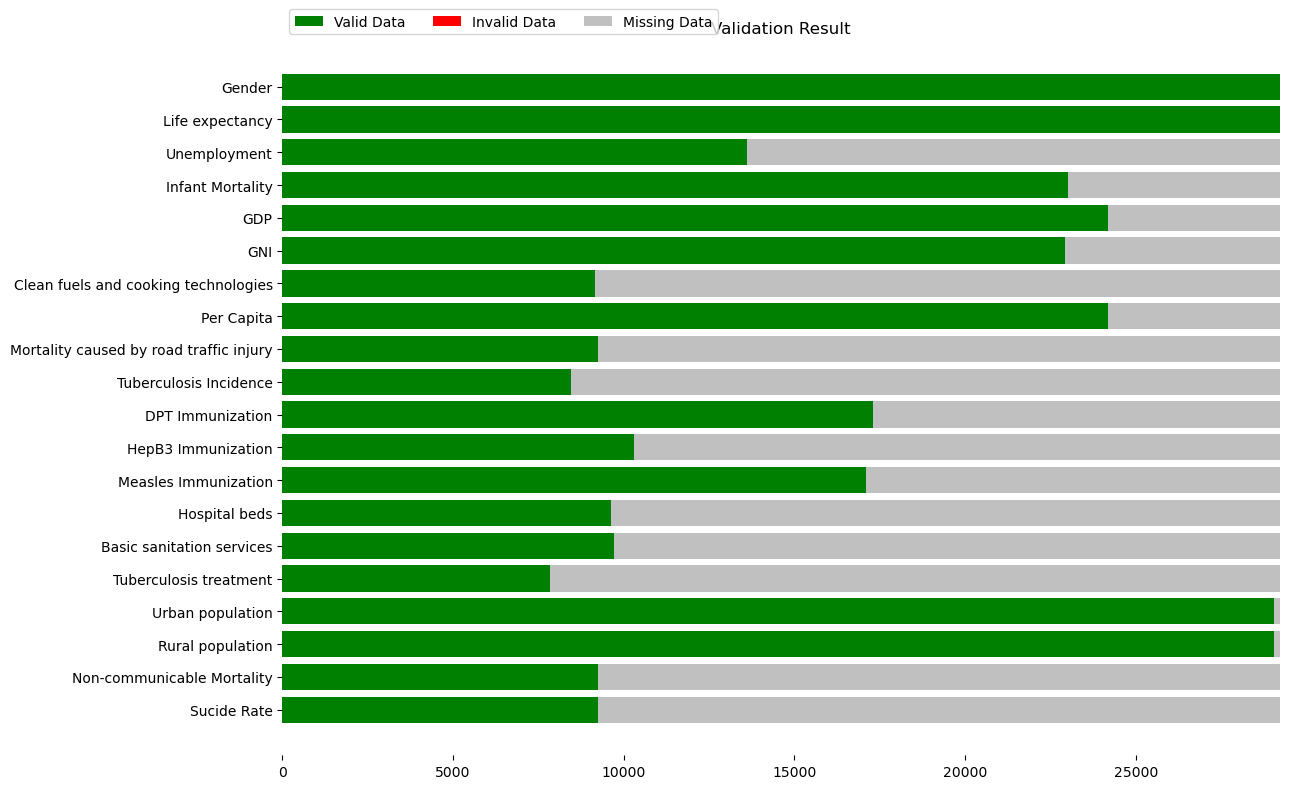

In [153]:
validateData(life_exp_data, validationObj)

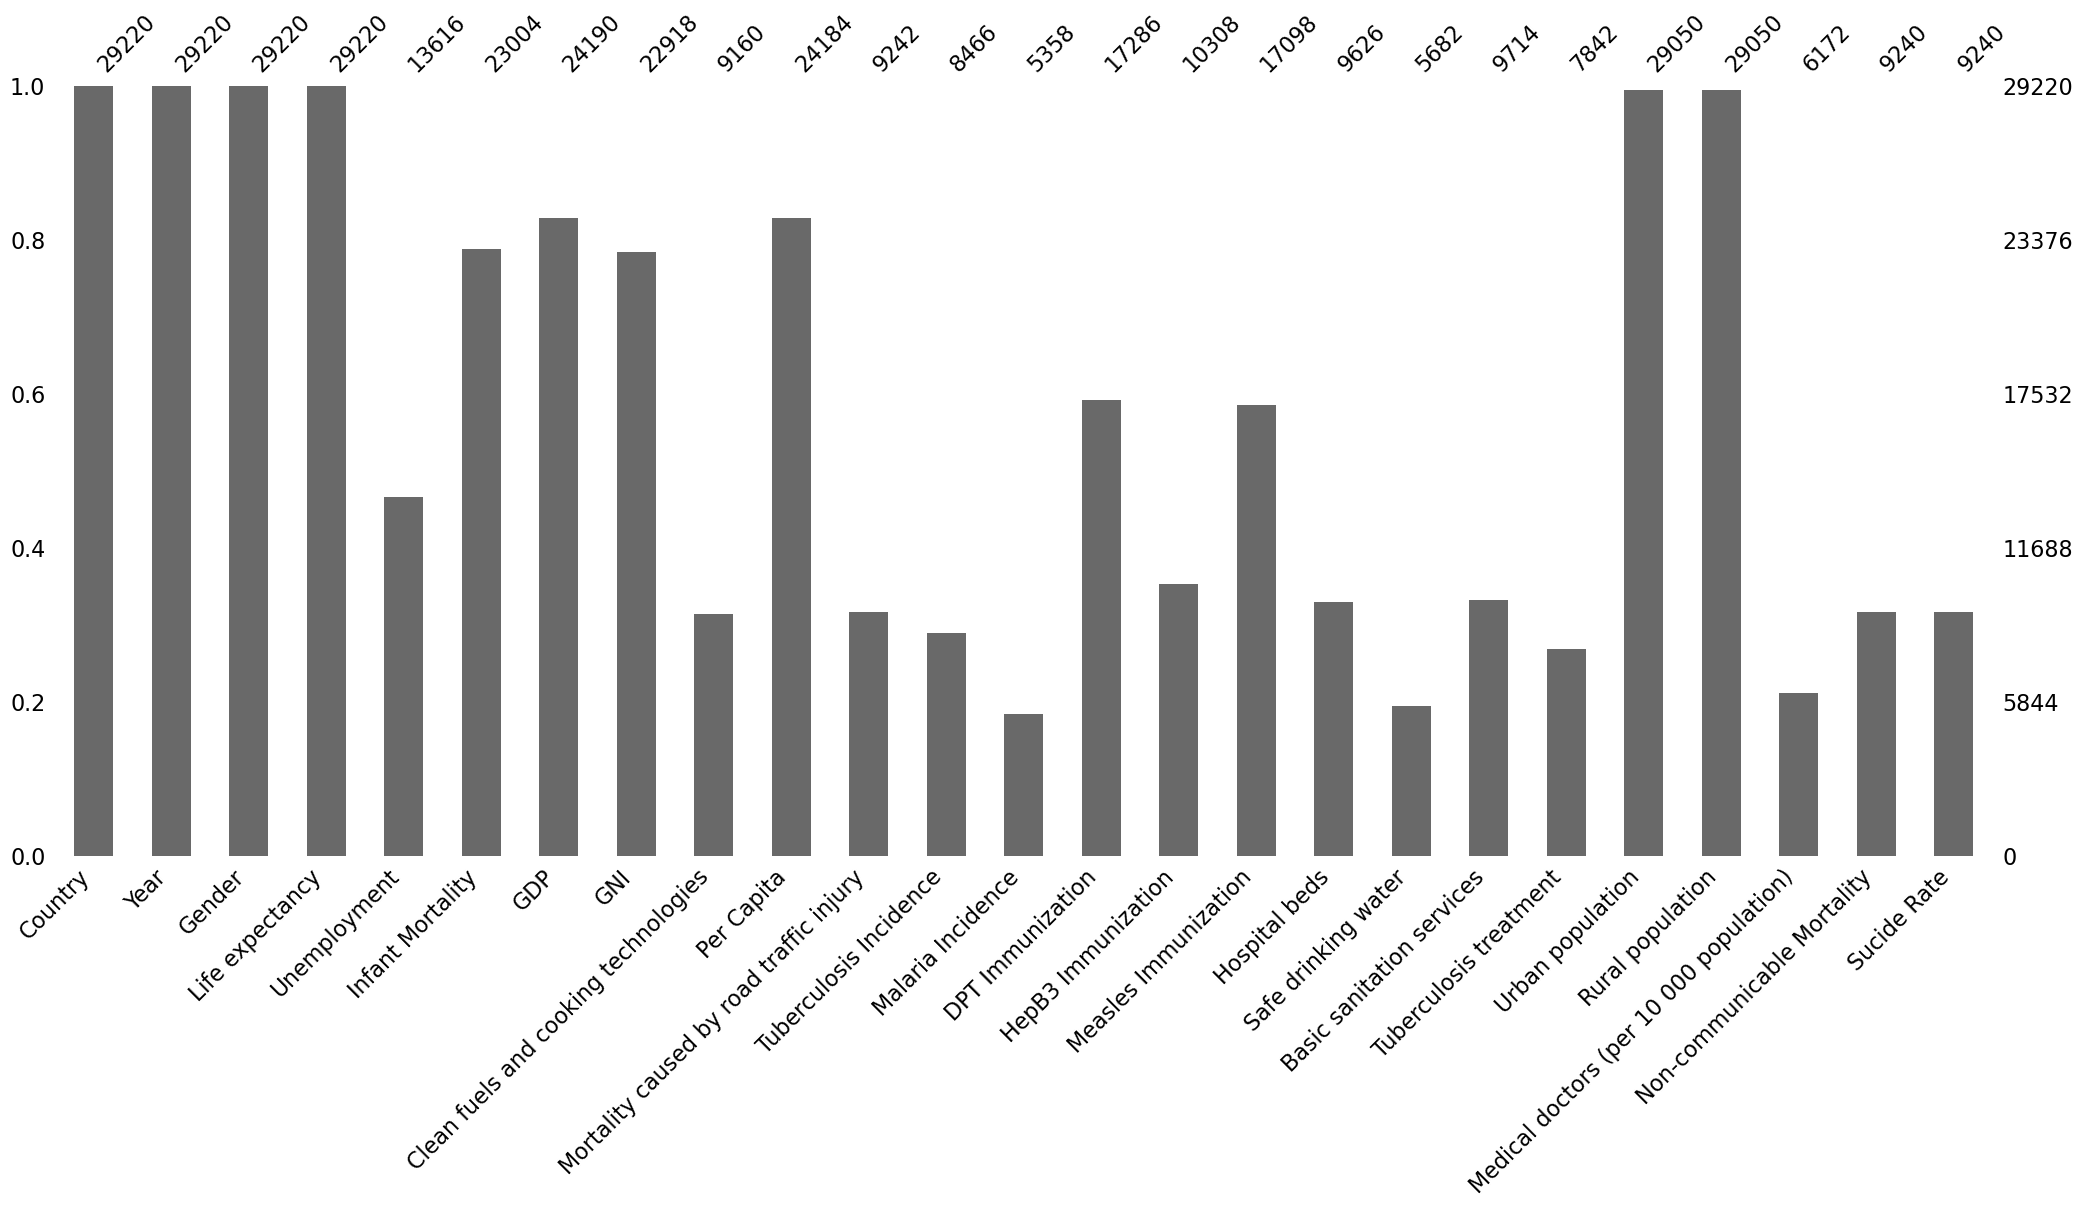

In [154]:
msno.bar(life_exp_data)
plt.show(1)

In [155]:
life_exp_dataSub = life_exp_data[life_exp_data['Year']>= 2000]

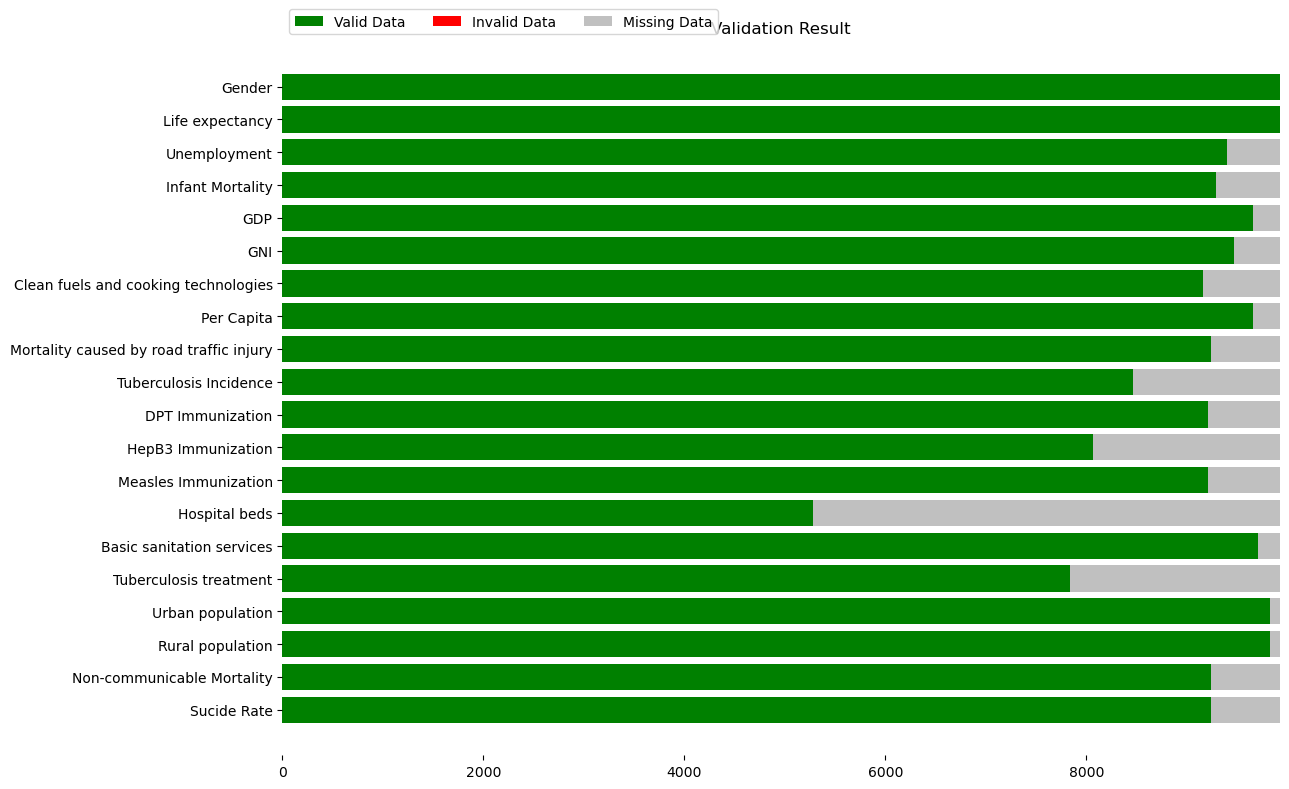

In [156]:
validateData(life_exp_dataSub, validationObj)

In [157]:
life_exp_dataSub = pd.DataFrame(life_exp_dataSub)

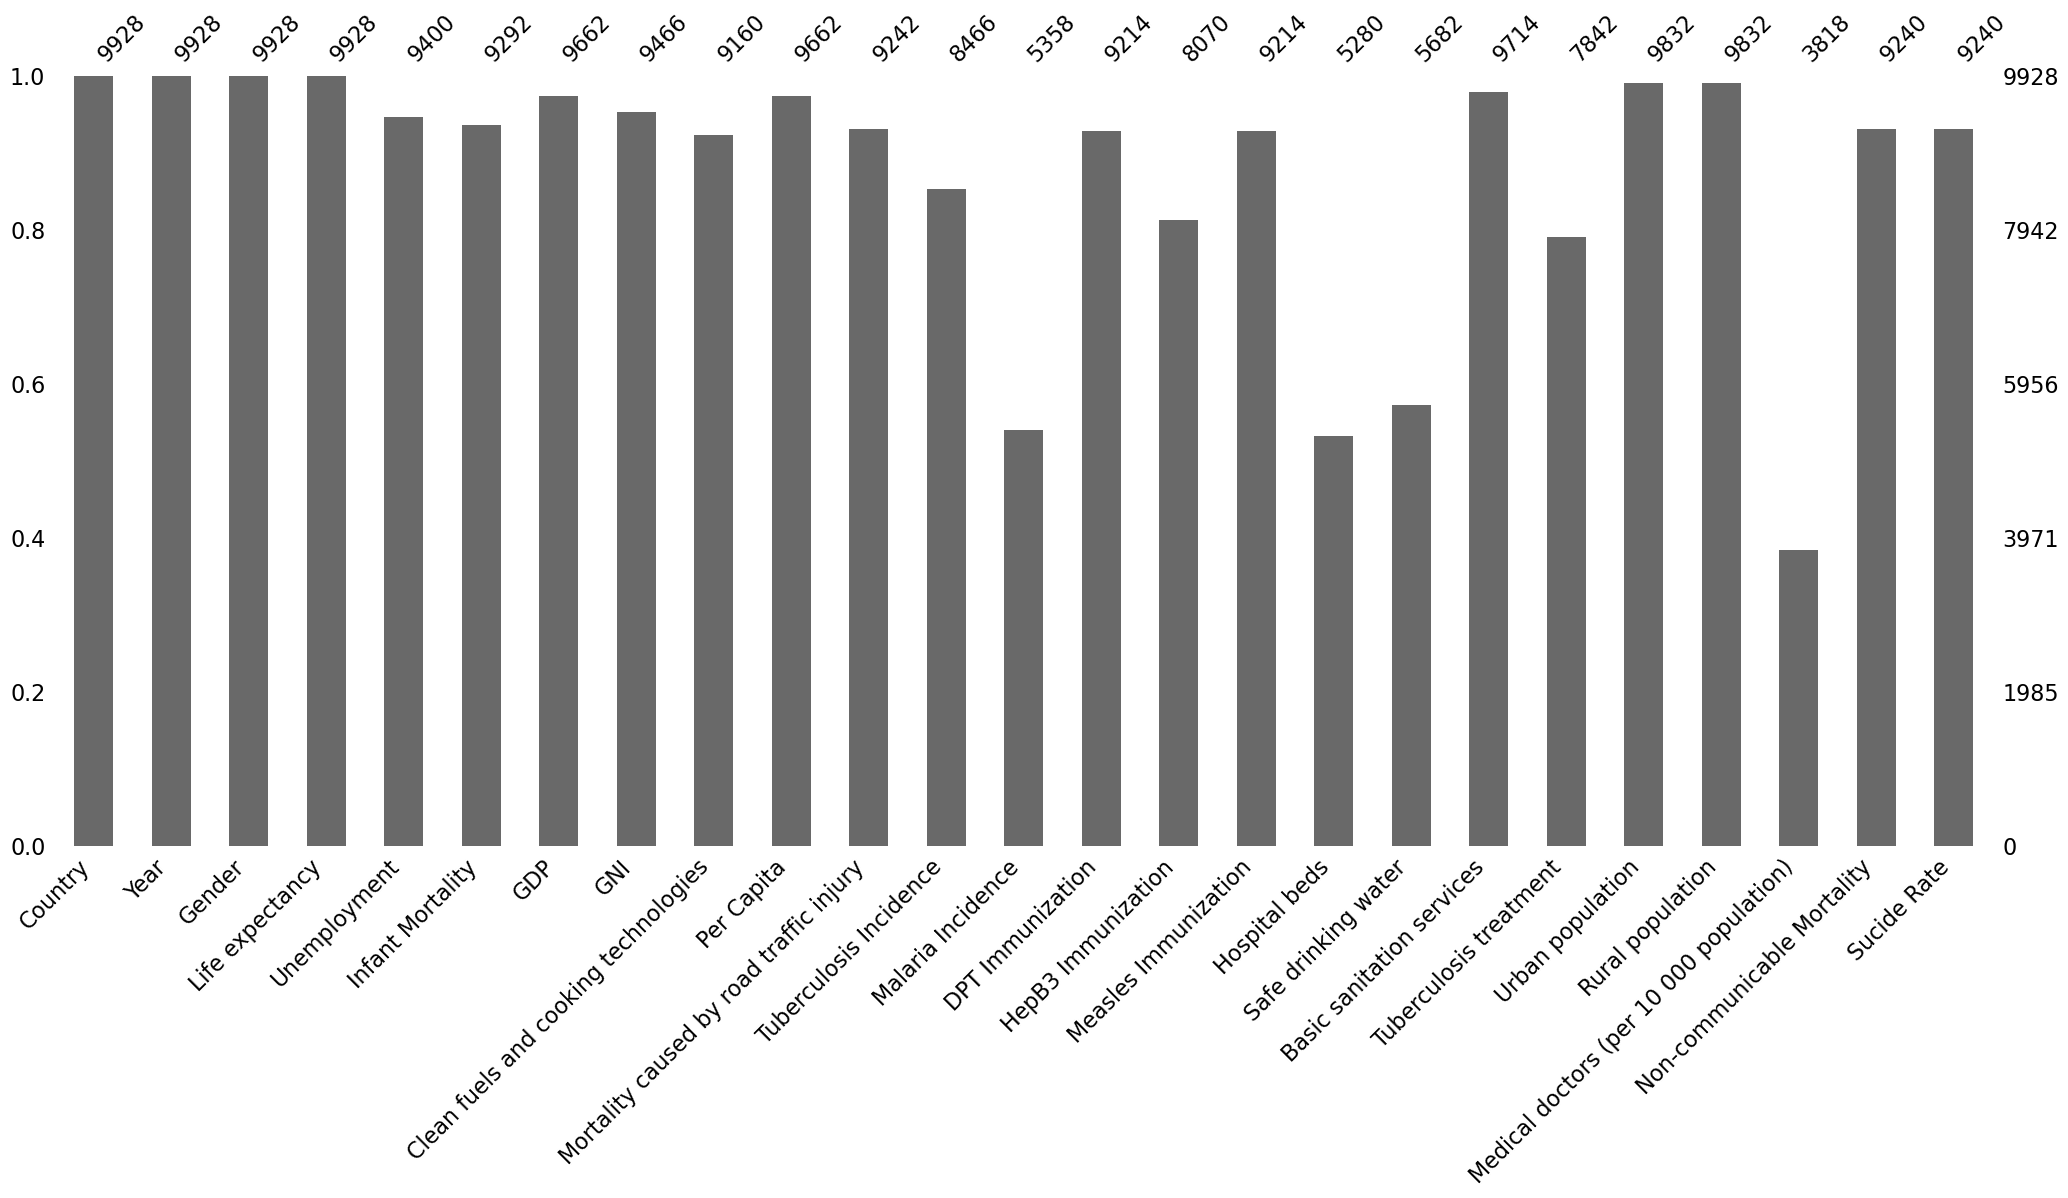

In [158]:
msno.bar(life_exp_dataSub)
plt.show()

In [159]:
colname = 'Unemployment'
printMissingValue(life_exp_dataSub[colname])

528 values are missing out of 9928 rows.


In [160]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [161]:
printMissingValue(life_exp_dataSub[colname])


528 values are missing out of 9928 rows.


In [162]:
def getNullCount(df, colname):
    nulldf= df[colname].isnull().groupby([df['Country']]).sum().astype(int).reset_index(name='Null Count')
    return nulldf.loc[nulldf["Null Count"]>0]

In [163]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
6,Antigua and Barbuda,40
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
88,Greenland,36
89,Grenada,40
112,Isle of Man,2


In [164]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
6,Antigua and Barbuda,40
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
88,Greenland,36
89,Grenada,40
112,Isle of Man,2


In [165]:
colname = 'Infant Mortality'
printMissingValue(life_exp_dataSub[colname])

636 values are missing out of 9928 rows.


In [166]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [167]:
printMissingValue(life_exp_dataSub[colname])

636 values are missing out of 9928 rows.


In [168]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [169]:
colname = 'GDP'
printMissingValue(life_exp_dataSub[colname])

266 values are missing out of 9928 rows.


In [170]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [171]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [172]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
121,"Korea, Dem. People's Rep.",40
219,St. Martin (French part),40


In [173]:
colname = 'GNI'
printMissingValue(life_exp_dataSub[colname])

462 values are missing out of 9928 rows.


In [174]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [175]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [176]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
90,Guam,40
121,"Korea, Dem. People's Rep.",40
197,San Marino,2
219,St. Martin (French part),40
250,Virgin Islands (U.S.),40


In [177]:
colname = 'Clean fuels and cooking technologies'
printMissingValue(life_exp_dataSub[colname])

768 values are missing out of 9928 rows.


In [178]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [179]:
printMissingValue(life_exp_dataSub[colname])

756 values are missing out of 9928 rows.


In [180]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [181]:
colname = 'Per Capita'
printMissingValue(life_exp_dataSub[colname])

266 values are missing out of 9928 rows.


In [182]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [183]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [184]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
121,"Korea, Dem. People's Rep.",40
219,St. Martin (French part),40


In [185]:
colname = 'Mortality caused by road traffic injury'
printMissingValue(life_exp_dataSub[colname])

686 values are missing out of 9928 rows.


In [186]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [187]:
printMissingValue(life_exp_dataSub[colname])

648 values are missing out of 9928 rows.


In [188]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40


In [189]:
colname = 'Tuberculosis Incidence'
printMissingValue(life_exp_dataSub[colname])

1462 values are missing out of 9928 rows.


In [190]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [191]:
printMissingValue(life_exp_dataSub[colname])

1402 values are missing out of 9928 rows.


In [192]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
2,Africa Western and Central,40
7,Arab World,40
36,Caribbean small states,40
39,Central Europe and the Baltics,40
41,Channel Islands,40
59,Early-demographic dividend,40
61,East Asia & Pacific (IDA & IBRD countries),40
71,Euro area,40
73,Europe & Central Asia (IDA & IBRD countries),40


In [193]:
colname = 'Malaria Incidence'
printMissingValue(life_exp_dataSub[colname])

4570 values are missing out of 9928 rows.


In [194]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [195]:
printMissingValue(life_exp_dataSub[colname])

4288 values are missing out of 9928 rows.


In [196]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
3,Albania,40
6,Antigua and Barbuda,40
10,Aruba,40
11,Australia,40
12,Austria,40
...,...,...
242,United Kingdom,40
243,United States,40
245,Uruguay,40
250,Virgin Islands (U.S.),40


In [197]:
colname = 'DPT Immunization'
printMissingValue(life_exp_dataSub[colname])

714 values are missing out of 9928 rows.


In [198]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [199]:
printMissingValue(life_exp_dataSub[colname])

676 values are missing out of 9928 rows.


In [200]:
printMissingValue(life_exp_dataSub[colname])

676 values are missing out of 9928 rows.


In [201]:
colname = 'HepB3 Immunization'
printMissingValue(life_exp_dataSub[colname])

1858 values are missing out of 9928 rows.


In [202]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [203]:
printMissingValue(life_exp_dataSub[colname])

878 values are missing out of 9928 rows.


In [204]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
55,Denmark,40
57,Dominica,2
76,Faroe Islands,40
78,Finland,40
81,French Polynesia,40


In [205]:
colname = 'Measles Immunization'
printMissingValue(life_exp_dataSub[colname])

714 values are missing out of 9928 rows.


In [206]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [207]:
printMissingValue(life_exp_dataSub[colname])

676 values are missing out of 9928 rows.


In [208]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40
99,"Hong Kong SAR, China",40


In [209]:
colname = 'Hospital beds'
printMissingValue(life_exp_dataSub[colname])

4648 values are missing out of 9928 rows.


In [210]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [211]:
printMissingValue(life_exp_dataSub[colname])

1202 values are missing out of 9928 rows.


In [212]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
2,Africa Western and Central,40
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
76,Faroe Islands,40
79,Fragile and conflict affected situations,40
81,French Polynesia,40
88,Greenland,36


In [213]:
colname = 'Safe drinking water'
printMissingValue(life_exp_dataSub[colname])

4246 values are missing out of 9928 rows.


In [214]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [215]:
printMissingValue(life_exp_dataSub[colname])

4126 values are missing out of 9928 rows.


In [216]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
5,Angola,40
6,Antigua and Barbuda,40
7,Arab World,40
8,Argentina,40
...,...,...
247,Vanuatu,40
248,"Venezuela, RB",40
249,Vietnam,40
253,"Yemen, Rep.",40


In [217]:
colname = 'Basic sanitation services'
printMissingValue(life_exp_dataSub[colname])

214 values are missing out of 9928 rows.


In [218]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [219]:
printMissingValue(life_exp_dataSub[colname])

44 values are missing out of 9928 rows.


In [220]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
112,Isle of Man,2
123,Kosovo,40
150,Marshall Islands,2


In [221]:
colname = 'Tuberculosis treatment'
printMissingValue(life_exp_dataSub[colname])

2086 values are missing out of 9928 rows.


In [222]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [223]:
printMissingValue(life_exp_dataSub[colname])

1406 values are missing out of 9928 rows.


In [224]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
2,Africa Western and Central,40
7,Arab World,40
36,Caribbean small states,40
39,Central Europe and the Baltics,40
41,Channel Islands,40
57,Dominica,2
59,Early-demographic dividend,40
61,East Asia & Pacific (IDA & IBRD countries),40
71,Euro area,40


In [225]:
colname = 'Urban population'
printMissingValue(life_exp_dataSub[colname])

96 values are missing out of 9928 rows.


In [226]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))


In [227]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [228]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
123,Kosovo,40
219,St. Martin (French part),40


In [229]:
colname = 'Rural population'
printMissingValue(life_exp_dataSub[colname])

96 values are missing out of 9928 rows.


In [230]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [231]:
printMissingValue(life_exp_dataSub[colname])

80 values are missing out of 9928 rows.


In [232]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
123,Kosovo,40
219,St. Martin (French part),40


In [233]:
colname = 'Medical doctors (per 10 000 population)'
printMissingValue(life_exp_dataSub[colname])

6110 values are missing out of 9928 rows.


In [234]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [235]:
printMissingValue(life_exp_dataSub[colname])

3566 values are missing out of 9928 rows.


In [236]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
1,Africa Eastern and Southern,40
2,Africa Western and Central,40
7,Arab World,40
10,Aruba,40
14,"Bahamas, The",40
...,...,...
249,Vietnam,40
250,Virgin Islands (U.S.),40
251,West Bank and Gaza,40
252,World,40


In [237]:
colname = 'Non-communicable Mortality'
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [238]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [239]:
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [240]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40


In [241]:
colname = 'Sucide Rate'
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [242]:
life_exp_dataSub[colname] = life_exp_dataSub.groupby("Country")[colname].transform(lambda x: x.fillna(x.mean()))

In [243]:
printMissingValue(life_exp_dataSub[colname])

688 values are missing out of 9928 rows.


In [244]:
getNullCount(life_exp_dataSub, colname)

,Country,Null Count
10,Aruba,40
22,Bermuda,40
37,Cayman Islands,2
41,Channel Islands,40
52,Curacao,22
57,Dominica,2
76,Faroe Islands,40
81,French Polynesia,40
88,Greenland,36
90,Guam,40


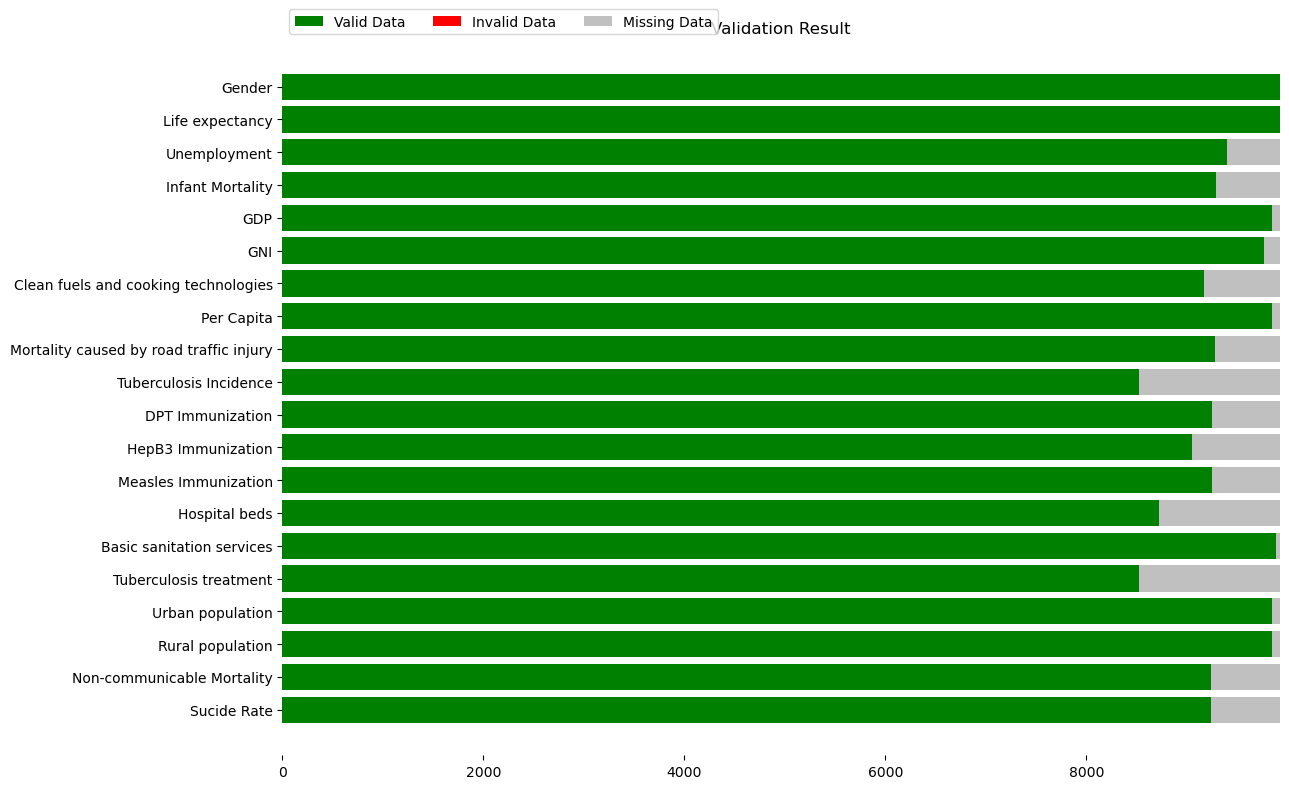

In [245]:
validateData(life_exp_dataSub, validationObj)


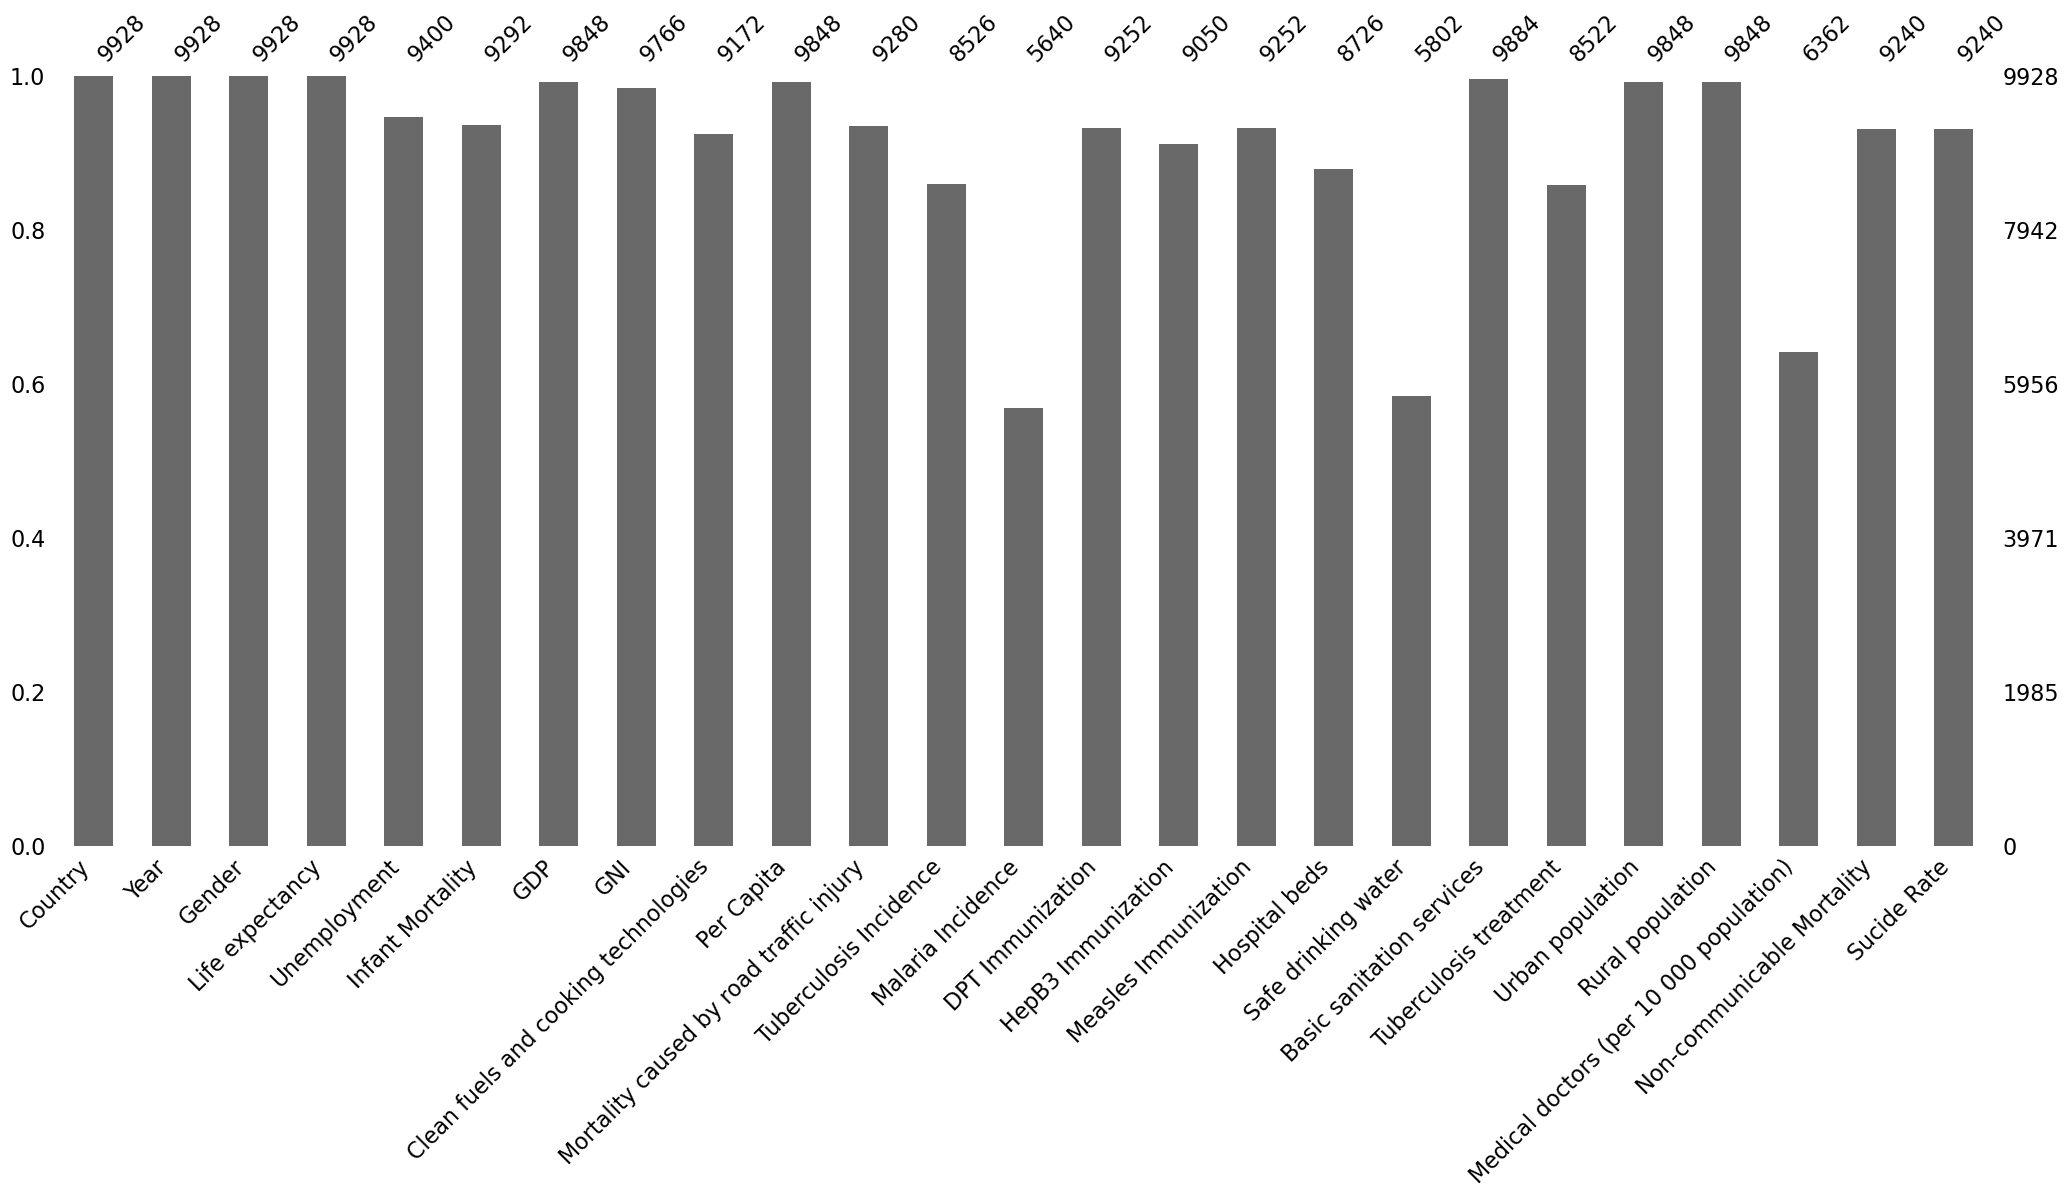

In [246]:
msno.bar(life_exp_dataSub)
plt.show(0)

In [247]:

for col in life_exp_dataSub.columns[life_exp_dataSub.isnull().any(axis=0)]:
        life_exp_dataSub[col].fillna(life_exp_dataSub[col].mean(),inplace=True)


In [248]:
checkMissingValue(life_exp_dataSub)

Total rows: 9928

Missing values: 0 	 Column Name: Country
Missing values: 0 	 Column Name: Year
Missing values: 0 	 Column Name: Gender
Missing values: 0 	 Column Name: Life expectancy
Missing values: 0 	 Column Name: Unemployment
Missing values: 0 	 Column Name: Infant Mortality
Missing values: 0 	 Column Name: GDP
Missing values: 0 	 Column Name: GNI
Missing values: 0 	 Column Name: Clean fuels and cooking technologies
Missing values: 0 	 Column Name: Per Capita
Missing values: 0 	 Column Name: Mortality caused by road traffic injury
Missing values: 0 	 Column Name: Tuberculosis Incidence
Missing values: 0 	 Column Name: Malaria Incidence
Missing values: 0 	 Column Name: DPT Immunization
Missing values: 0 	 Column Name: HepB3 Immunization
Missing values: 0 	 Column Name: Measles Immunization
Missing values: 0 	 Column Name: Hospital beds
Missing values: 0 	 Column Name: Safe drinking water
Missing values: 0 	 Column Name: Basic sanitation services
Missing values: 0 	 Column Name: Tu

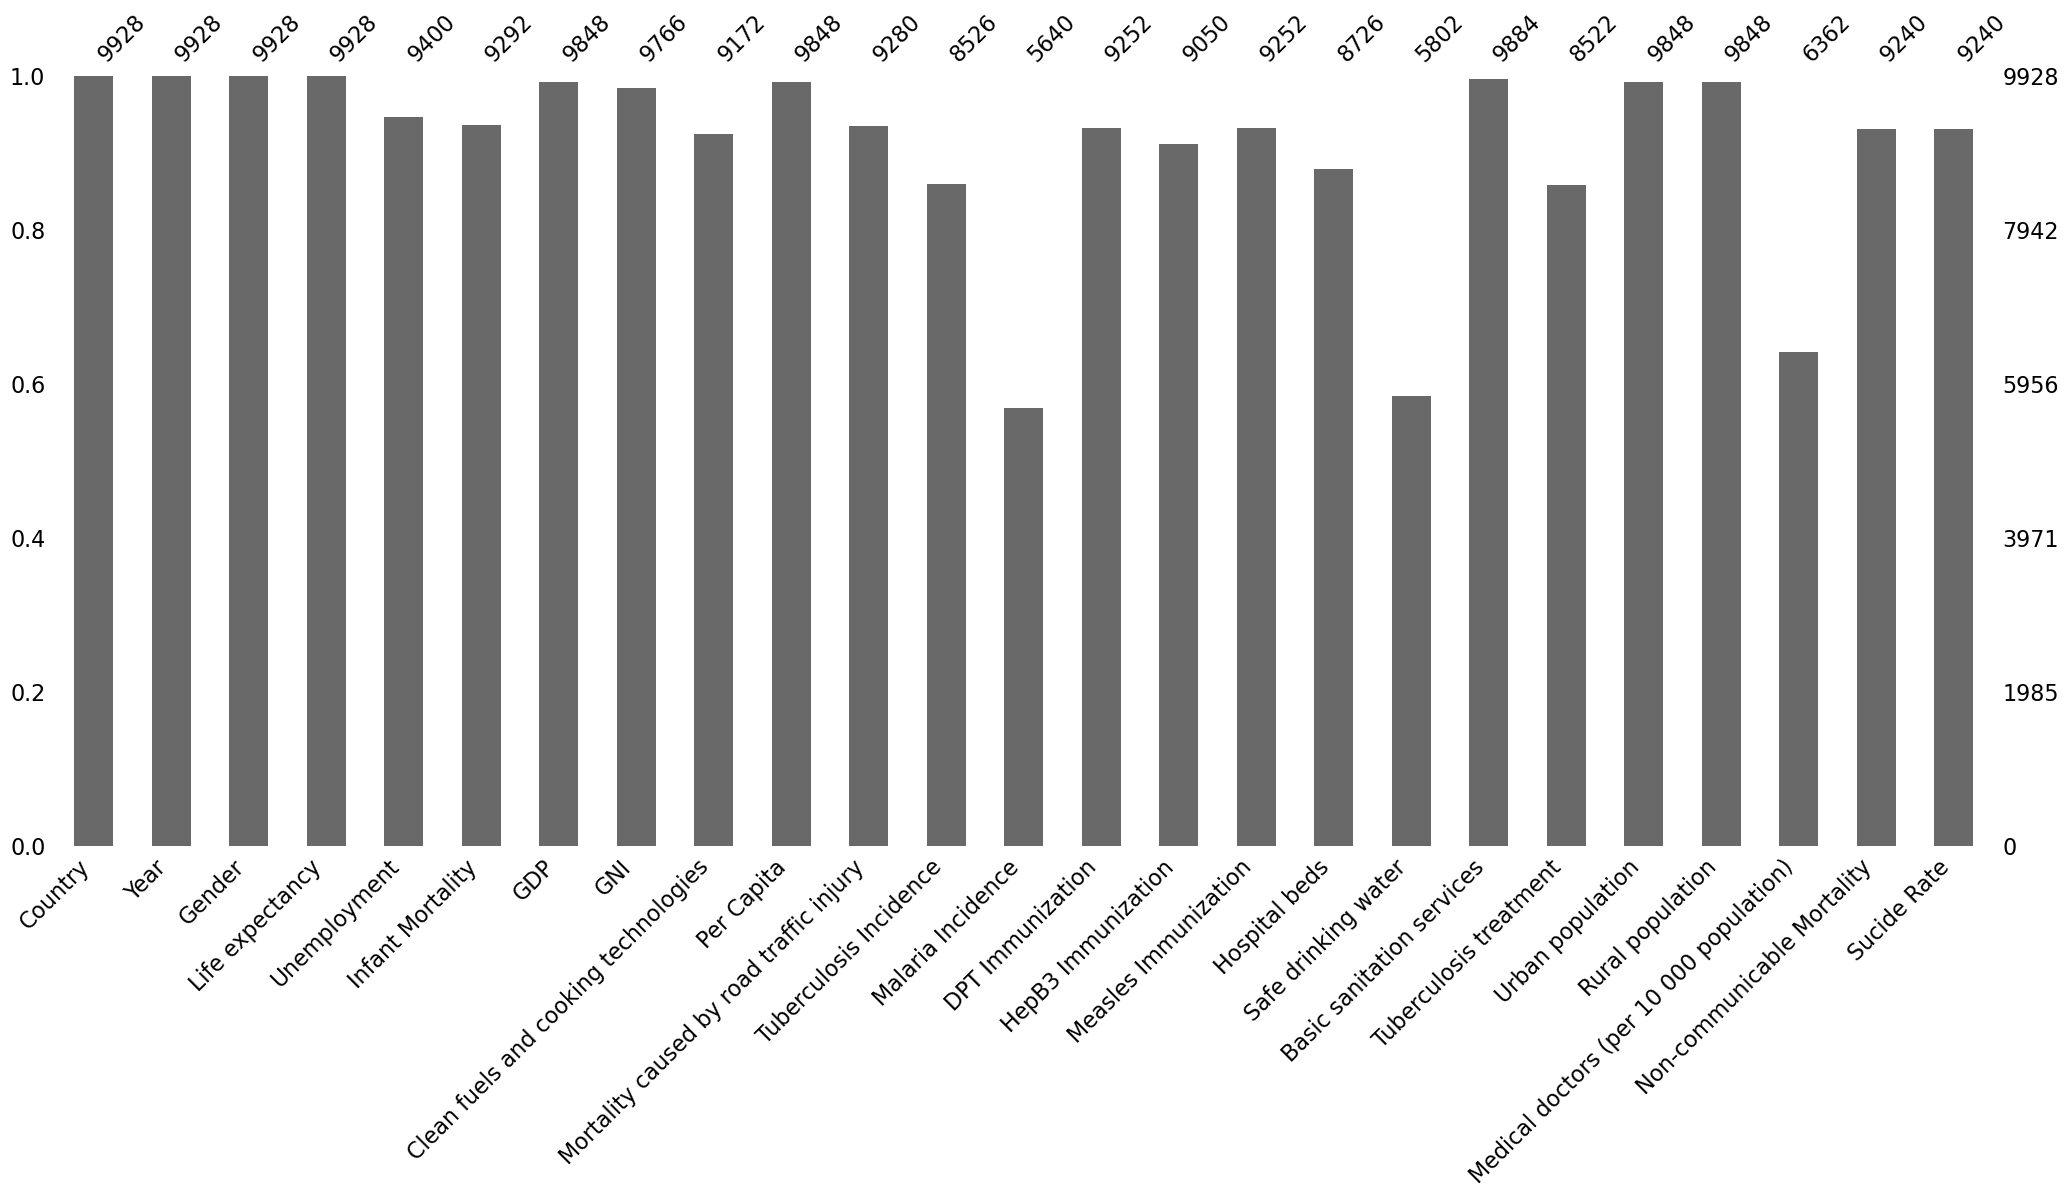

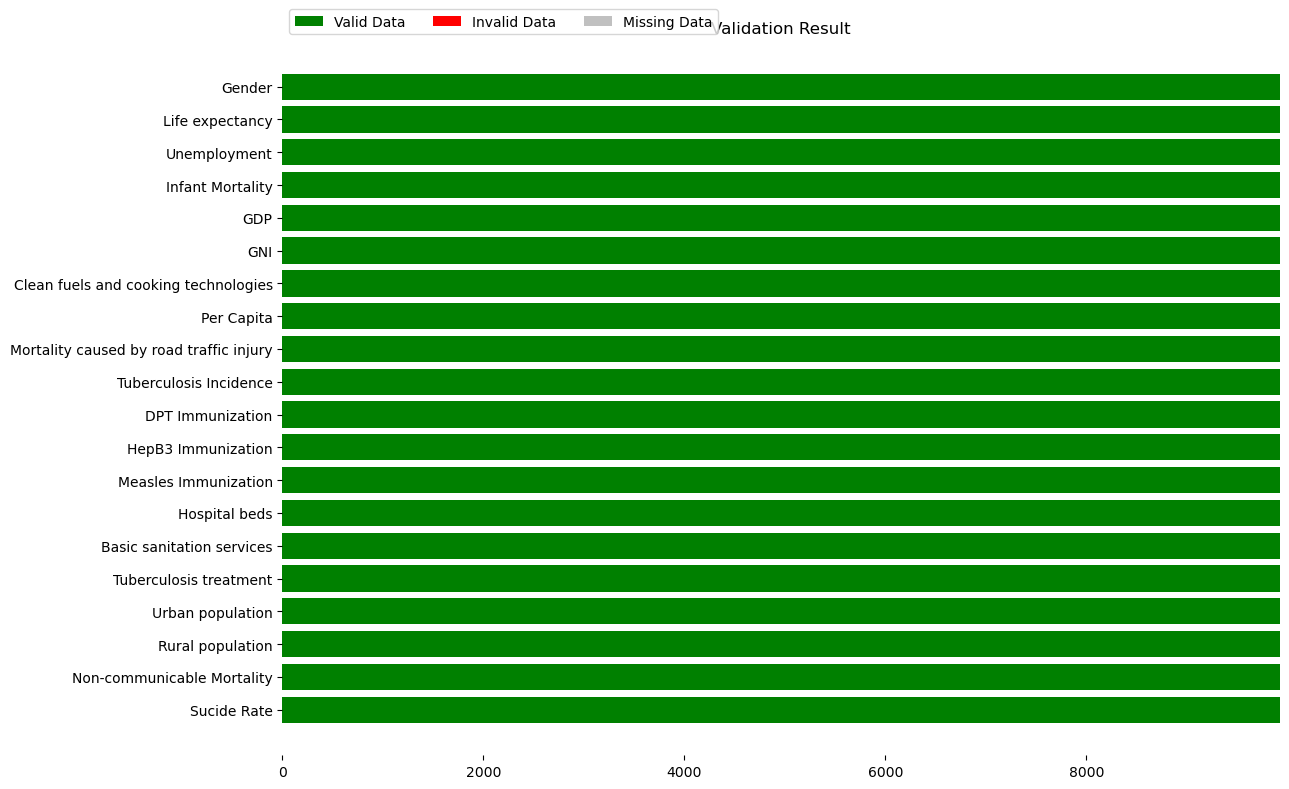

In [249]:
validateData(life_exp_dataSub, validationObj)

In [250]:
life_exp_dataSub.drop(['Country', 'Year'], axis=1, inplace=True)

In [251]:
life_exp_dataSub.head()

,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,...,Measles Immunization,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality,Sucide Rate
40,Female,57.120,13.846,85.0,1.368449e+10,1.824044e+10,6.4,434.739537,14.7,190.0,...,27.0,0.30,10.927531,21.870802,85.0,22.078,77.922,2.357733,39.4,4.8
41,Female,57.596,13.849,82.7,1.368449e+10,1.824044e+10,7.2,434.739537,15.1,189.0,...,37.0,0.39,10.938792,21.881304,84.0,22.169,77.831,1.899000,40.1,4.8
42,Female,58.080,14.355,80.4,4.055180e+09,1.824044e+10,8.2,179.426579,14.9,189.0,...,35.0,0.39,11.725373,23.274193,87.0,22.261,77.739,2.357733,40.5,4.6
43,Female,58.578,14.222,77.8,4.515559e+09,1.824044e+10,9.4,190.683814,15.0,189.0,...,39.0,0.39,12.512121,24.667435,86.0,22.353,77.647,2.357733,40.1,4.6
44,Female,59.093,14.047,75.3,5.226779e+09,1.824044e+10,10.4,211.382074,15.2,189.0,...,48.0,0.39,13.305995,26.067695,89.0,22.500,77.500,2.357733,40.2,4.6


In [252]:
duplicateCount = life_exp_dataSub.groupby(life_exp_dataSub.columns.tolist(),as_index=False).size()
duplicateCount.loc[duplicateCount['size']> 1]

,Gender,Life expectancy,Unemployment,Infant Mortality,GDP,GNI,Clean fuels and cooking technologies,Per Capita,Mortality caused by road traffic injury,Tuberculosis Incidence,...,Hospital beds,Safe drinking water,Basic sanitation services,Tuberculosis treatment,Urban population,Rural population,Medical doctors (per 10 000 population),Non-communicable Mortality,Sucide Rate,size


In [253]:
life_exp_dataSub.to_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\final.csv', index=False)

### loading and spliting the data

In [254]:
npca_x_train=pd.read_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\X_train.csv')
npca_x_test=pd.read_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\X_test.csv')
npca_y_train=pd.read_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\y_train.csv')
npca_y_test=pd.read_csv(r'C:\Users\tushar\Desktop\imrpved\improveDir\imrpvedwithout_pca\y_test.csv')

In [255]:
pca_x_train=pd.read_csv(r"C:\Users\tushar\Desktop\imrpved\improveDir\X_train.csv")
pca_x_test=pd.read_csv(r"C:\Users\tushar\Desktop\imrpved\improveDir\X_test.csv")
pca_y_train=pd.read_csv(r"C:\Users\tushar\Desktop\imrpved\improveDir\y_train.csv")
pca_y_test=pd.read_csv(r"C:\Users\tushar\Desktop\imrpved\improveDir\y_test.csv")

In [256]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import XG

### random forest model

In [257]:
def CallRF(x_train, x_test, y_train, y_test, param = None,model_type="non_pca"):
    if param is None:
        rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    else:
        rf = RandomForestRegressor(
            n_estimators = param["n_estimators"],
            min_samples_split = param["min_samples_split"],
            min_samples_leaf = param["min_samples_leaf"],
            max_features = param["max_features"],
            max_depth = param["max_depth"],
            bootstrap = param["bootstrap"]
        )
    rf.fit(x_train, y_train.values.ravel())
    predictions = rf.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = rf.score(x_train, y_train)
    r2_test = rf.score(x_test, y_test)
    return {
        "Model": f"RF({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test,
    }
rfmodel1_metrics=CallRF(npca_x_train, npca_x_test, npca_y_train, npca_y_test,model_type="non_pca")
rfmodel2_metrics = CallRF(pca_x_train, pca_x_test, pca_y_train, pca_y_test,model_type="pca")
rfmodel1_df = pd.DataFrame([rfmodel1_metrics])
rfmodel2_df = pd.DataFrame([rfmodel2_metrics])
RFmodel=pd.concat([rfmodel1_df,rfmodel2_df])

In [258]:
npca_x_train.shape

(5913, 18)

In [259]:
npca_x_test.shape

(2535, 18)

In [260]:
RFmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,RF(non_pca),0.775022,1.587004,1.259764,0.011531,0.995909,0.982652
0,RF(pca),1.241569,3.145991,1.773694,0.018355,0.993670,0.965610


### Hyperparameter tuning using RandomizedSearchCV


In [261]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [262]:
def CallRandomizedSearch(x_train, y_train):
    rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    rf_random.fit(x_train, y_train.values.ravel())
    print ('Best Parameters: ', rf_random.best_params_, ' \n')
    return rf_random.best_params_

In [263]:
npca_param = CallRandomizedSearch(npca_x_train, npca_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [264]:
param=CallRandomizedSearch(pca_x_train,pca_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [265]:
rfmodel3 = CallRF(npca_x_train, npca_x_test, npca_y_train, npca_y_test, npca_param)

In [266]:
rfmodel4 = CallRF(pca_x_train, pca_x_test, pca_y_train, pca_y_test, param)

### Linear regression

In [267]:
def CallLinearRegression(x_train, x_test, y_train, y_test,model_type="non_pca"):
    lr = LinearRegression()  
    lr.fit(x_train, y_train) 
    predictions = lr.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = lr.score(x_train, y_train)
    r2_test = lr.score(x_test, y_test)
    return {
        "Model":f"LR({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test,
    }
lrmodel1_metrics=CallLinearRegression(npca_x_train, npca_x_test, npca_y_train, npca_y_test,model_type="non_pca")
lrmodel2_metrics = CallLinearRegression(pca_x_train, pca_x_test, pca_y_train, pca_y_test,model_type="pca")
lrmodel1_df = pd.DataFrame([lrmodel1_metrics])
lrmodel2_df = pd.DataFrame([lrmodel2_metrics])
LRmodel=pd.concat([lrmodel1_df,lrmodel2_df])

In [268]:
LRmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,LR(non_pca),2.307118,9.539878,3.088669,0.034227,0.897503,0.895717
0,LR(pca),2.799623,13.133652,3.624038,0.041545,0.857621,0.856432


### Decsion Trees

In [269]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
import pandas as pd
def CallDecisionTree(x_train, x_test, y_train, y_test, param=None,model_type="non_pca"):
    if param is None:
        dt = DecisionTreeRegressor(random_state=42) 
    else:
        dt = DecisionTreeRegressor(
            criterion=param.get("criterion", "squared_error"),
            splitter=param.get("splitter", "best"),
            max_depth=param.get("max_depth"),
            min_samples_split=param.get("min_samples_split", 2),
            min_samples_leaf=param.get("min_samples_leaf", 1),
            random_state=42
        )
    dt.fit(x_train, y_train)
    predictions = dt.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = dt.score(x_train, y_train)
    r2_test = dt.score(x_test, y_test)
    return {
        "Model":f"DT({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test,
    }
dtmodel1_metrics=CallDecisionTree(npca_x_train, npca_x_test, npca_y_train, npca_y_test,model_type="non_pca")
dtmodel2_metrics = CallDecisionTree(pca_x_train, pca_x_test, pca_y_train, pca_y_test,model_type="pca")
dtmodel1_df = pd.DataFrame([dtmodel1_metrics])
dtmodel2_df = pd.DataFrame([dtmodel2_metrics])
DTmodel=pd.concat([dtmodel1_df,dtmodel2_df])

In [270]:
DTmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,DT(non_pca),1.007425,3.020120,1.737849,0.015072,0.997808,0.966986
0,DT(pca),1.701387,7.032813,2.651945,0.025460,0.997808,0.923122


### KNN

In [271]:
def CallKNN(x_train, x_test, y_train, y_test, param=None,model_type="non_pca"):
    if param is None:
        knn = KNeighborsRegressor(n_neighbors=5) 
    else:
        knn = KNeighborsRegressor(
            n_neighbors=param.get("n_neighbors", 5),        
            weights=param.get("weights", "uniform"),       
            algorithm=param.get("algorithm", "auto"),      
            leaf_size=param.get("leaf_size", 30),          
            p=param.get("p", 2)                            
        )
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = knn.score(x_train, y_train)
    r2_test = knn.score(x_test, y_test)
    return {
        "Model":f"KNN({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test,
    }
knnmodel1_metrics=CallKNN(npca_x_train, npca_x_test, npca_y_train, npca_y_test,model_type="non_pca")
knnmodel2_metrics = CallKNN(pca_x_train, pca_x_test, pca_y_train, pca_y_test,model_type="pca")
knnmodel1_df = pd.DataFrame([knnmodel1_metrics])
knnmodel2_df = pd.DataFrame([knnmodel2_metrics])
KNNmodel=pd.concat([knnmodel1_df,knnmodel2_df])

In [272]:
KNNmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,KNN(non_pca),1.132601,2.501804,1.581709,0.016710,0.983105,0.972652
0,KNN(pca),1.172369,2.691982,1.640726,0.017376,0.981644,0.970573


### SVM

In [273]:
def CallSVM(x_train, x_test, y_train, y_test, param=None,model_type="non_pca"):
    if param is None:
        svr = SVR(kernel='rbf')
    else:
        svr = SVR(
            kernel=param.get("kernel", "rbf"),        
            C=param.get("C", 1.0),                   
            epsilon=param.get("epsilon", 0.1),       
            gamma=param.get("gamma", "scale"),       
            degree=param.get("degree", 3)           
        )
    svr.fit(x_train, y_train.values.ravel())
    predictions = svr.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = svr.score(x_train, y_train)
    r2_test = svr.score(x_test, y_test)
    return {
        "Model":f"SVM({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test,
    }
svmmodel1_metrics=CallSVM(npca_x_train, npca_x_test, npca_y_train, npca_y_test,model_type="non_pca")
svmmodel2_metrics = CallSVM(pca_x_train, pca_x_test, pca_y_train, pca_y_test,model_type="pca")
svmmodel1_df = pd.DataFrame([svmmodel1_metrics])
svmmodel2_df = pd.DataFrame([svmmodel2_metrics])
SVMmodel=pd.concat([svmmodel1_df,svmmodel2_df])

In [274]:
SVMmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,SVM(non_pca),1.412905,4.538742,2.130432,0.021243,0.952399,0.950386
0,SVM(pca),1.874185,6.954230,2.637087,0.028210,0.926882,0.923981


### ADABOOST

In [275]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
def CallAdaBoost(x_train, x_test, y_train, y_test, param=None,model_type="non_pca"):
    if param is None:
        abr = AdaBoostRegressor(random_state=42, n_estimators=50)  
    else:
        abr = AdaBoostRegressor(
            n_estimators=param.get("n_estimators", 50),         
            learning_rate=param.get("learning_rate", 1.0),      
            loss=param.get("loss", "linear"),                  
            random_state=42
        )
    abr.fit(x_train, y_train.values.ravel()) 
    predictions = abr.predict(x_test)
     # Calculate metrics
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = abr.score(x_train, y_train)
    r2_test = abr.score(x_test, y_test)
    return {
        "Model":f"ADABoost({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test,
    }
adamodel1_metrics=CallAdaBoost(npca_x_train, npca_x_test, npca_y_train, npca_y_test,model_type="non_pca")
adamodel2_metrics = CallAdaBoost(pca_x_train, pca_x_test, pca_y_train, pca_y_test,model_type="pca")
adamodel1_df = pd.DataFrame([adamodel1_metrics])
adamodel2_df = pd.DataFrame([adamodel2_metrics])
ADABOOSTmodel=pd.concat([adamodel1_df,adamodel2_df])

In [276]:
ADABOOSTmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,ADABoost(non_pca),2.390680,8.402836,2.898765,0.034841,0.909322,0.908146
0,ADABoost(pca),2.825791,12.086833,3.476612,0.042179,0.870433,0.867875


### XGboost

In [278]:
from xgboost import XGBRegressor
def CallXGBoost(x_train, x_test, y_train, y_test, param=None, model_type="non_pca"):
    if param is None:
        model = XGBRegressor(random_state=42)
    else:
        model = XGBRegressor(
            n_estimators=param["n_estimators"],
            max_depth=param["max_depth"],
            learning_rate=param["learning_rate"]
        )  
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, predictions)
    r2_train = model.score(x_train, y_train)
    r2_test = model.score(x_test, y_test)
    return {
        "Model": f"XGBoost({model_type})",
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Train R^2": r2_train,
        "Test R^2": r2_test
    }
xgmodel1_metrics = CallXGBoost(npca_x_train, npca_x_test, npca_y_train, npca_y_test, model_type="non_pca")
xgmodel2_metrics = CallXGBoost(pca_x_train, pca_x_test, pca_y_train, pca_y_test, model_type="pca")
xgmodel1_df = pd.DataFrame([xgmodel1_metrics])
xgmodel2_df = pd.DataFrame([xgmodel2_metrics])
XGmodel = pd.concat([xgmodel1_df, xgmodel2_df])

In [279]:
XGmodel

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,XGBoost(non_pca),0.792580,1.498983,1.224330,0.011535,0.995761,0.983614
0,XGBoost(pca),1.325385,3.362475,1.833705,0.019496,0.993499,0.963244


### Results

In [280]:
Result_scores=pd.concat([RFmodel,LRmodel,DTmodel,KNNmodel,SVMmodel,ADABOOSTmodel,XGmodel],ignore_index=True)

In [281]:
Result_scores

,Model,MAE,MSE,RMSE,MAPE,Train R^2,Test R^2
0,RF(non_pca),0.775022,1.587004,1.259764,0.011531,0.995909,0.982652
1,RF(pca),1.241569,3.145991,1.773694,0.018355,0.993670,0.965610
2,LR(non_pca),2.307118,9.539878,3.088669,0.034227,0.897503,0.895717
3,LR(pca),2.799623,13.133652,3.624038,0.041545,0.857621,0.856432
4,DT(non_pca),1.007425,3.020120,1.737849,0.015072,0.997808,0.966986
5,DT(pca),1.701387,7.032813,2.651945,0.025460,0.997808,0.923122
6,KNN(non_pca),1.132601,2.501804,1.581709,0.016710,0.983105,0.972652
7,KNN(pca),1.172369,2.691982,1.640726,0.017376,0.981644,0.970573
8,SVM(non_pca),1.412905,4.538742,2.130432,0.021243,0.952399,0.950386
9,SVM(pca),1.874185,6.954230,2.637087,0.028210,0.926882,0.923981
